### Table of Contents

* [1. Import Libraries](#chapter1)
* [2. Import Dataset](#chapter2)
* [3. Text Data](#chapter3)
    * [3.1. Bags of Words](#section_3_1)    
    * [3.2. PCA](#section_3_2)
    * [3.3. t-SNE](#section_3_3)
    * [3.4. Classification](#section_3_4)
    * [3.5. Word Embedding](#section_3_5)
    * [3.6. Supervised](#section_3_6)
* [4. Image Data](#chapter4)
    * [4.1. ORB](#section_4_1)
    * [4.2. Transfer Learning & Fine-tuning](#section_4_2)

# 1. Import Libraries<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.image import imread
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import EnglishStemmer
import os
from os import listdir
from sklearn import metrics
from sklearn import decomposition, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from PIL import Image, ImageFilter, ImageOps
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from keras.preprocessing.image import load_img, img_to_array
import joblib
import cv2
import wget
import zipfile
from top2vec import Top2Vec
from gensim.models import Word2Vec
import gensim.downloader as api

# 2. Import Dataset<a class="anchor" id="chapter2"></a>

In [2]:
data = joblib.load('df_clean.pkl')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
data.head()

description  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel (...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                  image            cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care   
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing   

                                   description_clean  \
0  [eleg, polyest, abstract, eyelet, door, curtai...   
1  [sathiya, cotton, bath, towel, bath, towel, re...   
2  [eurospa, cotton, terri, face, towel, small, g...   
3  [santosh, royal, fashion, cotton, king, doubl,...   
4  [jaipur, cotton, floral, king, doubl, bedsheet...   

                                   description_final  
0  eleg polyest abstract eyelet door curtain flor...  
1  sathiya cotton bath towel bath towel red yello...  
2  eurospa cotton terri face towel small gsm euro...  
3  santosh royal fashion cotton king doubl bedshe...  
4  jaipur cotton floral king doubl bedsheet cotto...

In [5]:
df = data.copy()

In [6]:
sns.set_theme(style='darkgrid')

# 3. Text Data<a class="anchor" id="chapter3"></a>

## 3.1. Bags of Words<a class="anchor" id="section_3_1"></a>

In this section, we will use the technique of tfidf to represent words in the column 'description' in a numeric format for multilabel classification.

In [7]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
X = tfidf.fit_transform(df['description_final'])

In [8]:
df_tfidf = pd.DataFrame(data=X.todense(), columns=tfidf.get_feature_names())

In [9]:
df_tfidf.head()

aa  aapno  aari  abil  abl  abod  abroad    absorb  abstract   ac  accent  \
0  0.0    0.0   0.0   0.0  0.0   0.0     0.0  0.000000  0.186421  0.0     0.0   
1  0.0    0.0   0.0   0.0  0.0   0.0     0.0  0.000000  0.000000  0.0     0.0   
2  0.0    0.0   0.0   0.0  0.0   0.0     0.0  0.058464  0.000000  0.0     0.0   
3  0.0    0.0   0.0   0.0  0.0   0.0     0.0  0.000000  0.000000  0.0     0.0   
4  0.0    0.0   0.0   0.0  0.0   0.0     0.0  0.000000  0.000000  0.0     0.0   

   access  accessori  accid  accident  accord  ach  acid  acn  acryl  act  \
0     0.0        0.0    0.0       0.0     0.0  0.0   0.0  0.0    0.0  0.0   
1     0.0        0.0    0.0       0.0     0.0  0.0   0.0  0.0    0.0  0.0   
2     0.0        0.0    0.0       0.0     0.0  0.0   0.0  0.0    0.0  0.0   
3     0.0        0.0    0.0       0.0     0.0  0.0   0.0  0.0    0.0  0.0   
4     0.0        0.0    0.0       0.0     0.0  0.0   0.0  0.0    0.0  0.0   

   activ  actual   ad  adaa  adaptor  add  addit  adhes  adi  adida  adjust  \
0    0.0     0.0  0.0   0.0      0.0  0.0    0.0    0.0  0.0    0.0     0.0   
1    0.0     0.0  0.0   0.0      0.0  0.0    0.0    0.0  0.0    0.0     0.0   
2    0.0     0.0  0.0   0.0      0.0  0.0    0.0    0.0  0.0    0.0     0.0   
3    0.0     0.0  0.0   0.0      0.0  0.0    0.0    0.0  0.0    0.0     0.0   
4    0.0     0.0  0.0   0.0      0.0  0.0    0.0    0.0  0.0    0.0     0.0   

   admir  ador  adorn  adsl  advanc  advic  aero  affect  afford  afternoon  \
0    0.0   0.0    0.0   0.0     0.0    0.0   0.0     0.0     0.0        0.0   
1    0.0   0.0    0.0   0.0     0.0    0.0   0.0     0.0     0.0        0.0   
2    0.0   0.0    0.0   0.0     0.0    0.0   0.0     0.0     0.0        0.0   
3    0.0   0.0    0.0   0.0     0.0    0.0   0.0     0.0     0.0        0.0   
4    0.0   0.0    0.0   0.0     0.0    0.0   0.0     0.0     0.0        0.0   

   age  agrasen  agromech  aid  air  airtex  airtight  akshaj  ...  wire  \
0  0.0      0.0       0.0  0.0  0.0     0.0       0.0     0.0  ...   0.0   
1  0.0      0.0       0.0  0.0  0.0     0.0       0.0     0.0  ...   0.0   
2  0.0      0.0       0.0  0.0  0.0     0.0       0.0     0.0  ...   0.0   
3  0.0      0.0       0.0  0.0  0.0     0.0       0.0     0.0  ...   0.0   
4  0.0      0.0       0.0  0.0  0.0     0.0       0.0     0.0  ...   0.0   

   wireless  wisdom      wish  withstand  wok  woman  wonder  wonderchef  \
0       0.0     0.0  0.073781        0.0  0.0    0.0     0.0         0.0   
1       0.0     0.0  0.000000        0.0  0.0    0.0     0.0         0.0   
2       0.0     0.0  0.000000        0.0  0.0    0.0     0.0         0.0   
3       0.0     0.0  0.000000        0.0  0.0    0.0     0.0         0.0   
4       0.0     0.0  0.000000        0.0  0.0    0.0     0.0         0.0   

   wood  wooden  woodi  woodino  wool  work  workmanship     world  worn  \
0   0.0     0.0    0.0      0.0   0.0   0.0          0.0  0.061446   0.0   
1   0.0     0.0    0.0      0.0   0.0   0.0          0.0  0.000000   0.0   
2   0.0     0.0    0.0      0.0   0.0   0.0          0.0  0.000000   0.0   
3   0.0     0.0    0.0      0.0   0.0   0.0          0.0  0.000000   0.0   
4   0.0     0.0    0.0      0.0   0.0   0.0          0.0  0.000000   0.0   

   worri  worshipp  woven  wow  wrap  wrapper  wring    wrinkl  wrist  write  \
0    0.0       0.0    0.0  0.0   0.0      0.0    0.0  0.077011    0.0    0.0   
1    0.0       0.0    0.0  0.0   0.0      0.0    0.0  0.000000    0.0    0.0   
2    0.0       0.0    0.0  0.0   0.0      0.0    0.0  0.000000    0.0    0.0   
3    0.0       0.0    0.0  0.0   0.0      0.0    0.0  0.000000    0.0    0.0   
4    0.0       0.0    0.0  0.0   0.0      0.0    0.0  0.000000    0.0    0.0   

   xemex   xl   xp  xyz  yardley  yarn      year    yellow  ygs  yield   yk  \
0    0.0  0.0  0.0  0.0      0.0   0.0  0.000000  0.000000  0.0    0.0  0.0   
1    0.0  0.0  0.0  0.0      0.0   0.0  0.000000  0.193633  0.0    0.0  0.0   
2    0.0  0.0  

## 3.2. PCA<a class="anchor" id="section_3_2"></a>

In [10]:
def display_circles(pcs, n_comp, pca, axis_ranks,
                    labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # figure initialization
            fig, ax = plt.subplots(figsize=(7, 6))

            # determining the graph of limits
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin = min(pcs[d1, :])
                xmax = max(pcs[d1, :])
                ymin = min(pcs[d2, :])
                ymax = max(pcs[d2, :])

            # arrows display
            # if there are more than 30 arrows,
            # we do not display the triangle at their extremity
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy',
                           scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines,
                                                 axes=ax,
                                                 alpha=.1,
                                                 color='black'))

            # Variable names display
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation,
                                 color="blue", alpha=0.5)

            # circle display
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # definition of graph limits
            plt.xlim(-1, 1)
            plt.ylim(-1, 1)

            # display of horizontal and vertical lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # name of the axes, with the percentage of inertia explained
            plt.xlabel('F{} ({}%)'.format(d1+1,
                                          round(100 *
                                                pca
                                                .explained_variance_ratio_[d1],
                                                1)))
            plt.ylabel('F{} ({}%)'.format(d2+1,
                                          round(100 *
                                                pca
                                                .explained_variance_ratio_[d2],
                                                1)))

            plt.title("Correlation circle (F{} and F{})".format(d1+1, d2+1))
            plt.show(block=False)


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rank of the inertia axis")
    plt.ylabel("percentage of inertia")
    plt.title("Scree of eigenvalues")
    plt.show(block=False)

In [11]:
def pca(df, columns, hue):
    # choice of the number of components to be calculated
    n_comp = 2

    # selection of columns to be taken into account in the PCA
    data_pca = df[columns]

    # data preparation for PCA
    X = data_pca.values
    features = data_pca.columns

    # standardization
    # X_scaled = preprocessing.StandardScaler().fit_transform(X)

    # Calculation of principal components
    pca = decomposition.PCA(n_components=n_comp, random_state=42)
    pca.fit(X)

    # Scree eigenvalues
    display_scree_plot(pca)

    # Correlation circle
    pcs = pca.components_
    display_circles(pcs, n_comp, pca,
                    [(0, 1)], labels=np.array(features))

    # Projection of individuals
    X_projected = pca.transform(X)

    axis_ranks = [(0, 1)]
    for d1, d2 in axis_ranks:
        fig, scatter = plt.subplots(figsize=(10, 10))
        sns.scatterplot(X_projected[:, d1], X_projected[:, d2],
                        data=df, hue=hue, palette='Paired')
        plt.xlabel('F{} ({}%)'.format(d1+1,
                                      round(100 * pca
                                            .explained_variance_ratio_[d1],
                                            1)))
        plt.ylabel('F{} ({}%)'.format(d2+1,
                                      round(100 * pca
                                            .explained_variance_ratio_[d2],
                                            1)))
        plt.title("Projection of individuals (on F{} and F{})"
                  .format(d1+1, d2+1))

        plt.show()

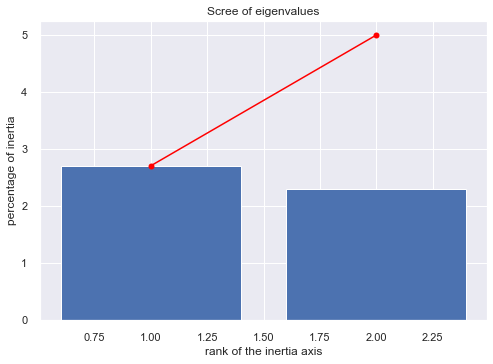

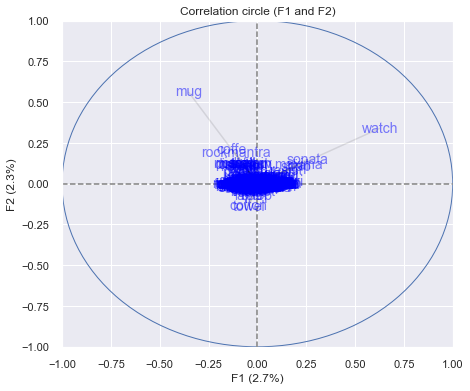

C:\Users\melme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


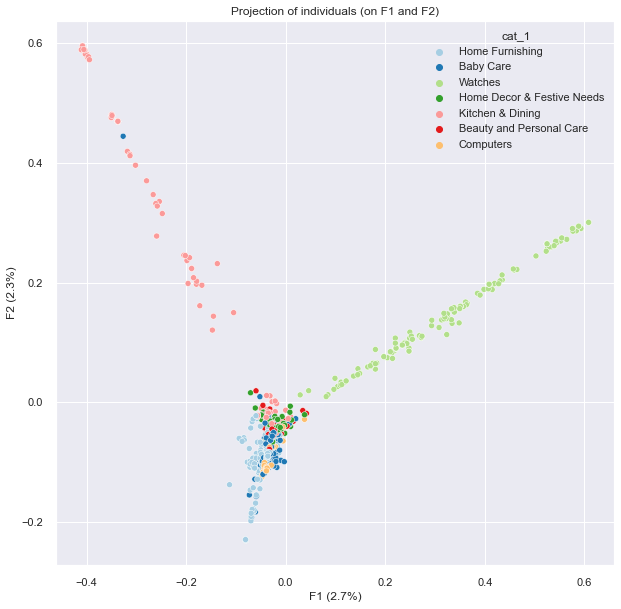

In [12]:
pca(df_tfidf, df_tfidf.columns.tolist(), df['cat_1'])

## 3.3. t-SNE<a class="anchor" id="section_3_3"></a>

In [13]:
X = df_tfidf.values
features = df_tfidf.columns

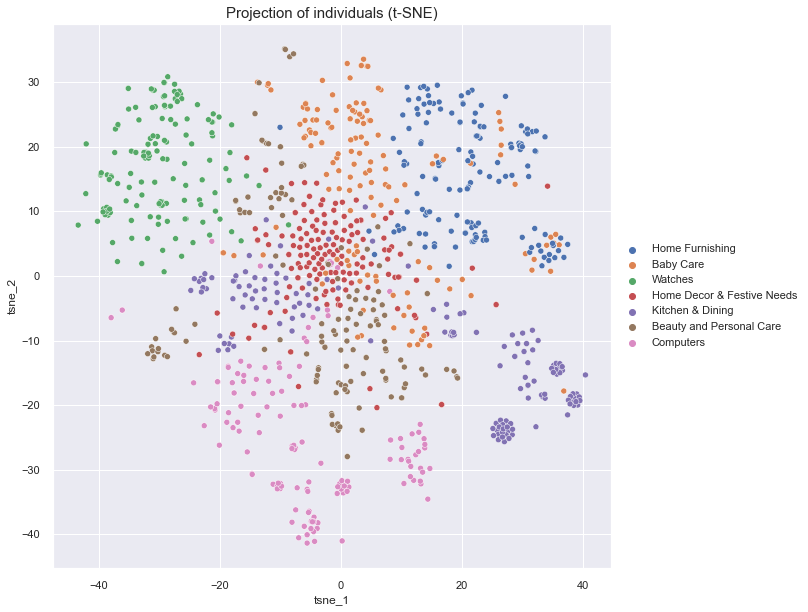

In [14]:
n_components = 2
tsne = TSNE(n_components, random_state=42)
X_tsne = tsne.fit_transform(X)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df['cat_1']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## 3.4. Clustering<a class="anchor" id="section_3_4"></a>

- In this part, we will create clusters with the KMeans algorithm.
- The number of clusters will be determined first with the Elbow method and secondly, it will be equal to the number of categories (7).
- The topics will be highlighted with the LDA method.

### Number of clusters defined by Elbow

#### KMeans

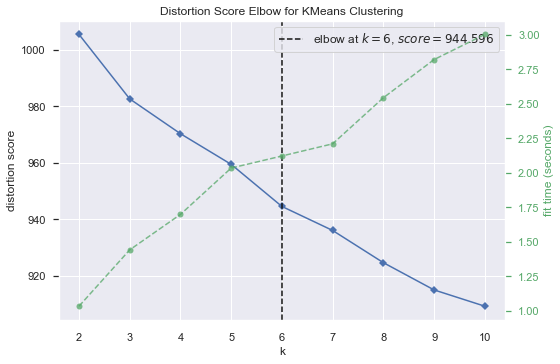

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), random_state=42)

visualizer.fit(df_tfidf.copy())
visualizer.poof()

In [16]:
model = KMeans(6, random_state=42)

In [17]:
model.fit(df_tfidf)
df['Cluster_1'] = model.predict(df_tfidf)

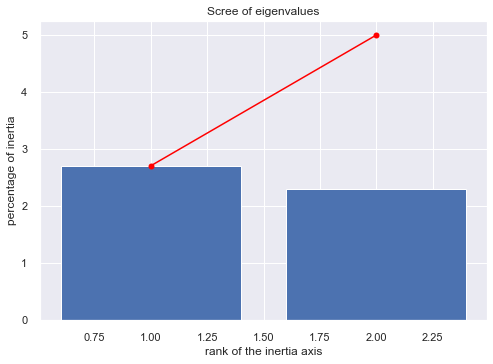

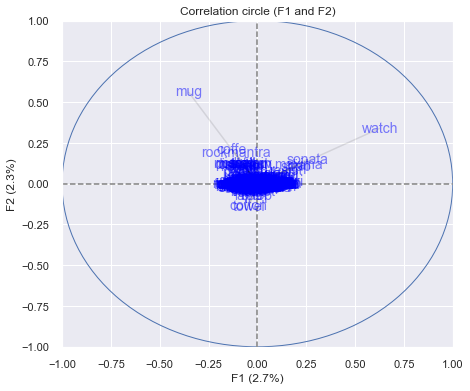

C:\Users\melme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


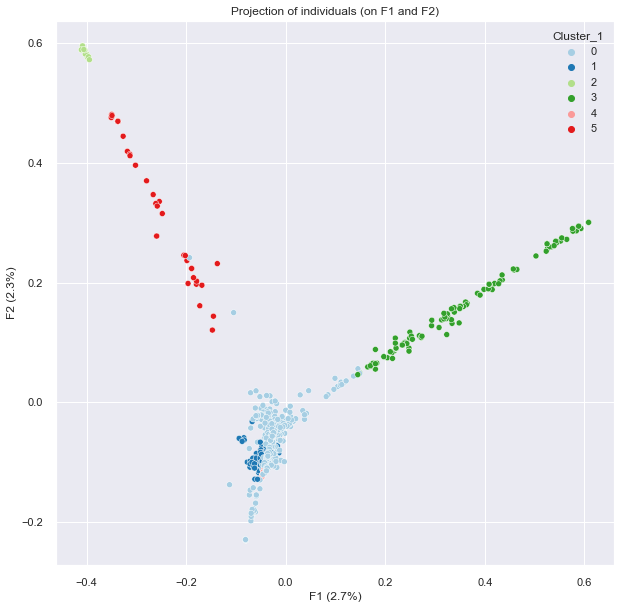

In [18]:
pca(df_tfidf, df_tfidf.columns.tolist(), df['Cluster_1'])

In [19]:
X = df_tfidf.values
features = df_tfidf.columns

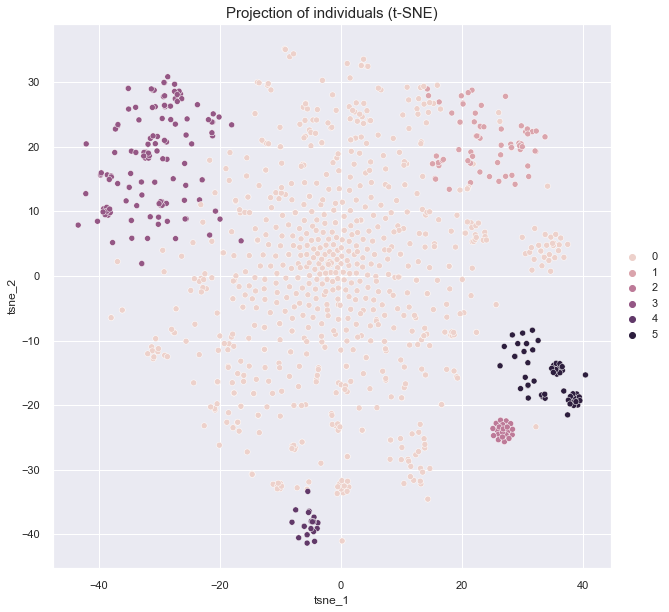

In [20]:
n_components = 2
tsne = TSNE(n_components, random_state=42)
X_tsne = tsne.fit_transform(X)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df['Cluster_1']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Count')

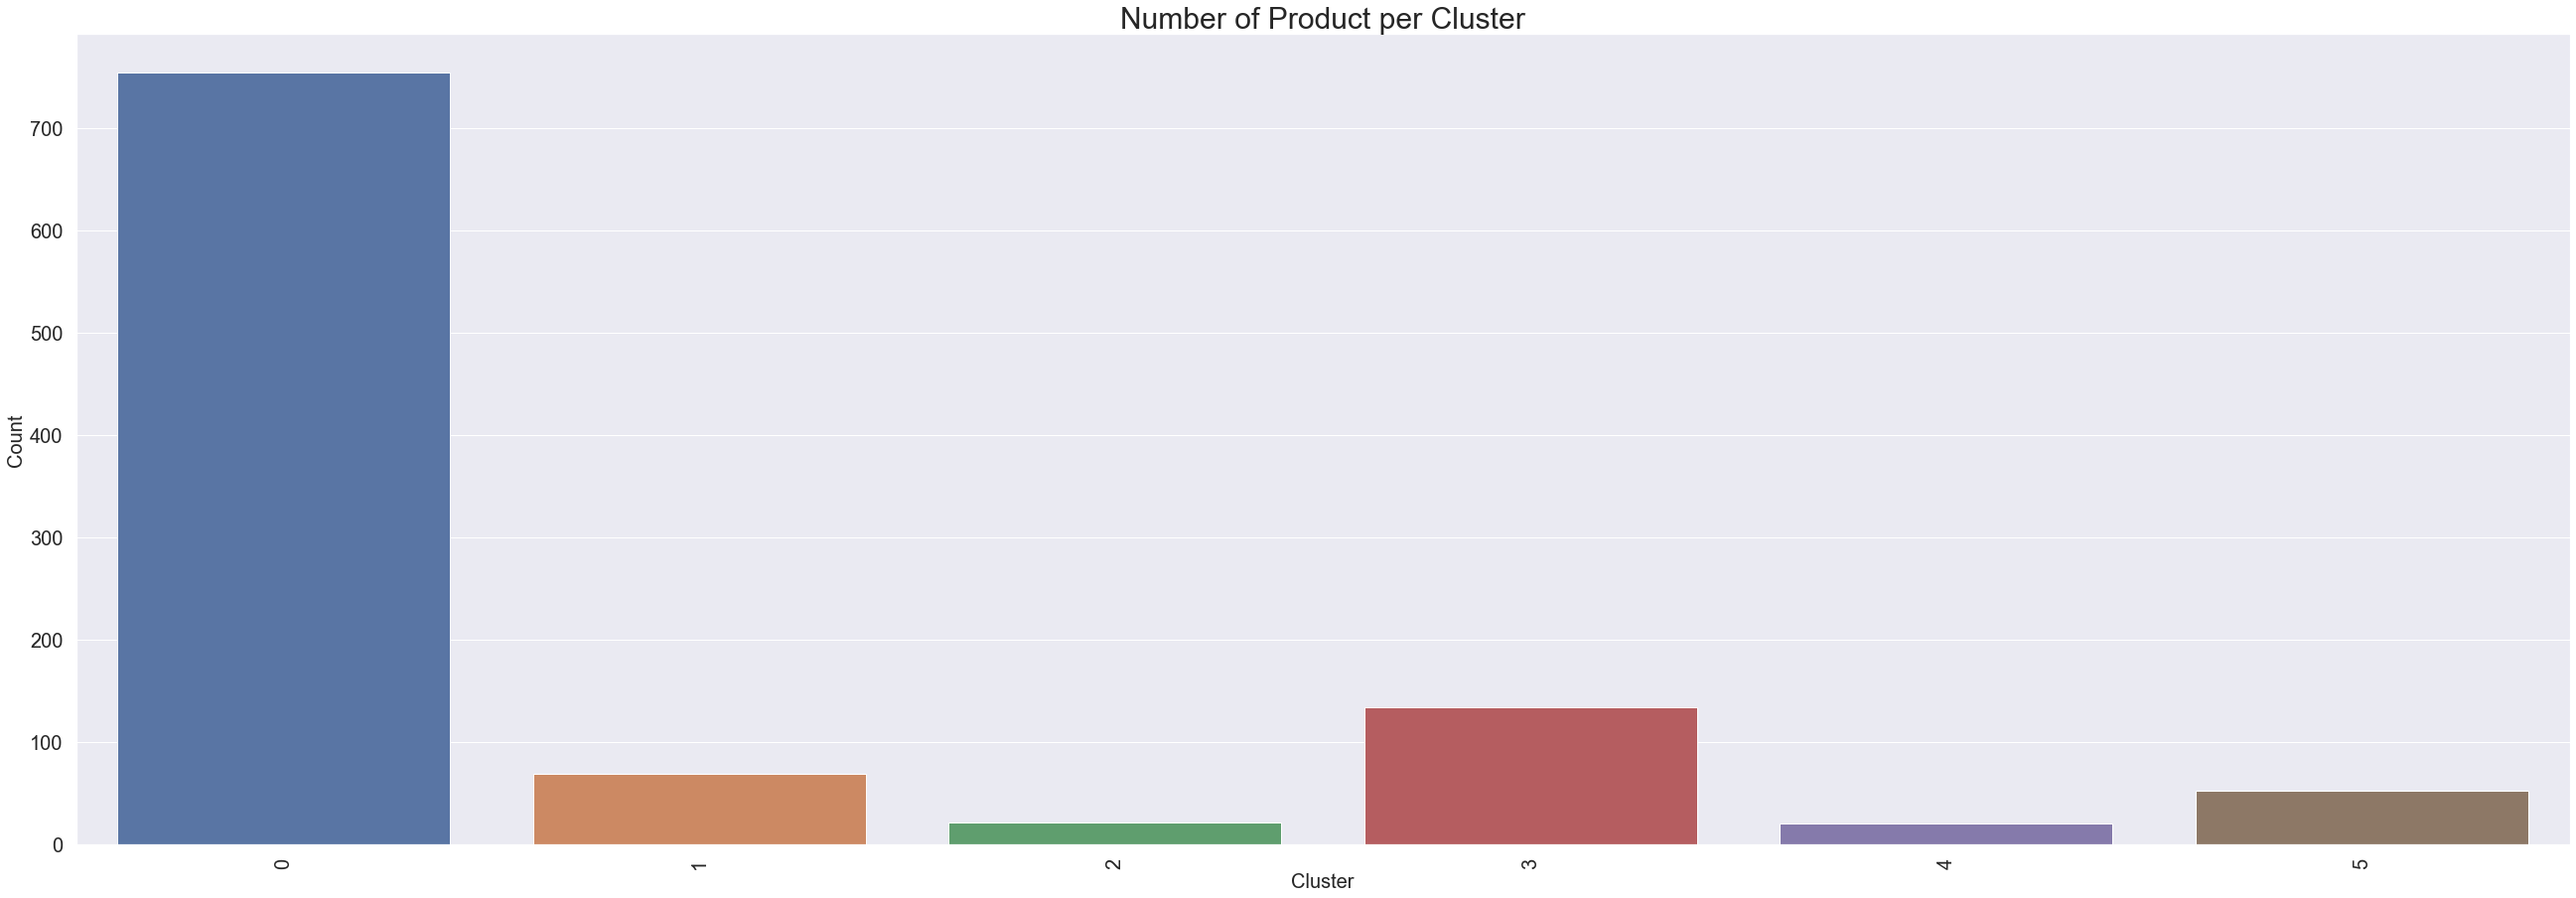

In [21]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_1'].value_counts().index,
            y=df['Cluster_1'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [22]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_1'], df['cat_1']))

ARI :  0.12256624231516706


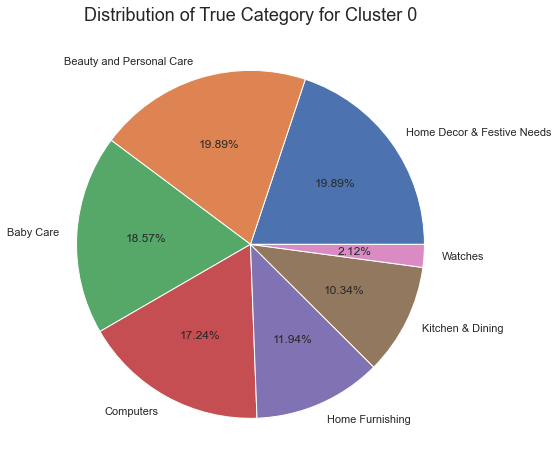

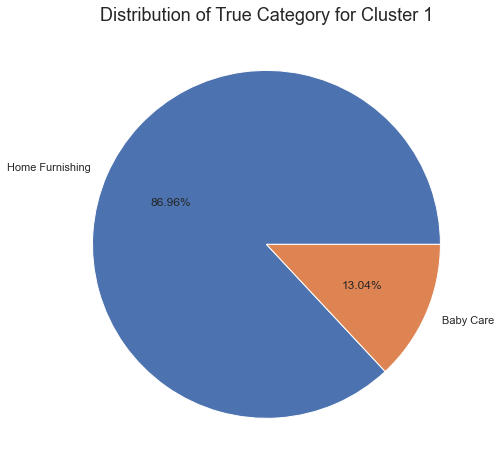

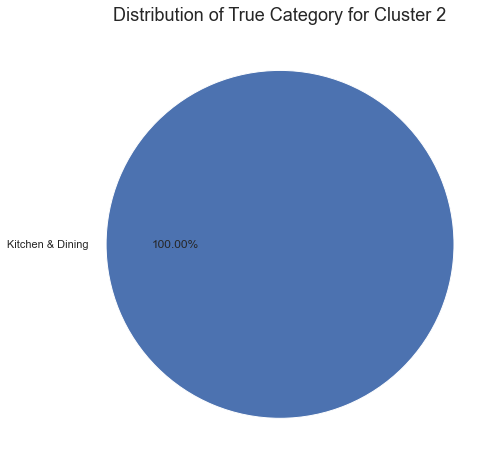

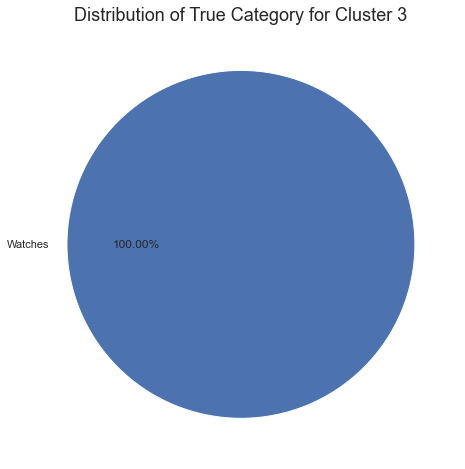

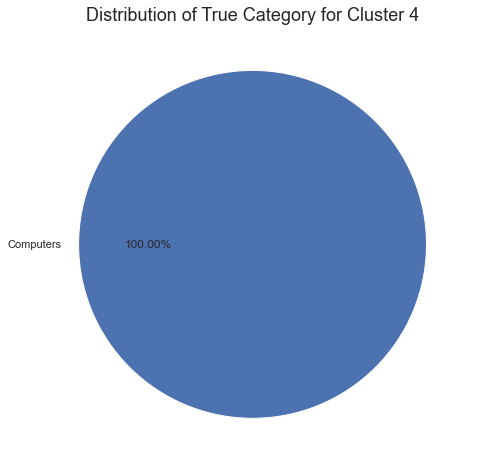

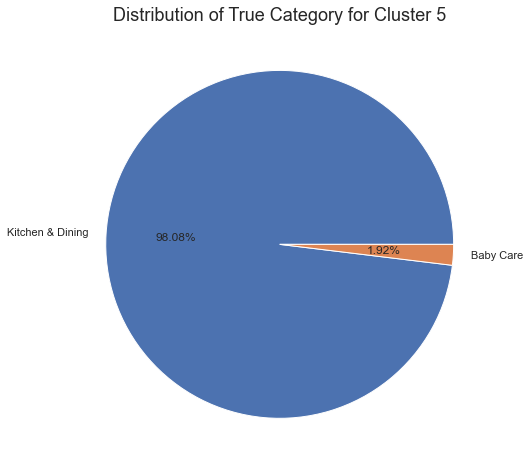

In [23]:
for i in range(6):
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_1'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

#### LDA

In [24]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
X = tfidf.fit_transform(df['description_final'])

In [25]:
n_topics = 6

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=42)

lda.fit(X)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=6, random_state=42)

In [26]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [27]:
no_top_words = 10
display_topics(lda, tfidf.get_feature_names(), no_top_words)

Topic 0:
quilt singl cell hp laptop pavilion rajasthan jewelleri bowl dohar
Topic 1:
eyelet polyest aroma curtain door led brown self window bodi
Topic 2:
cushion watch time denver parti wed playboy mxofer yardley soap
Topic 3:
watch mug cotton skin laptop towel dial sonata pad mous
Topic 4:
sticker vinyl medium wallmantra wall larg hair uberlyf appli tenda
Topic 5:
usb ganesha lowest fan lipstick charger appl laptop bottl kadhai


### Number of clusters equal to the number of categories

#### KMeans

In [28]:
model = KMeans(7, random_state=42)

In [29]:
model.fit(df_tfidf)
df['Cluster_2'] = model.predict(df_tfidf)

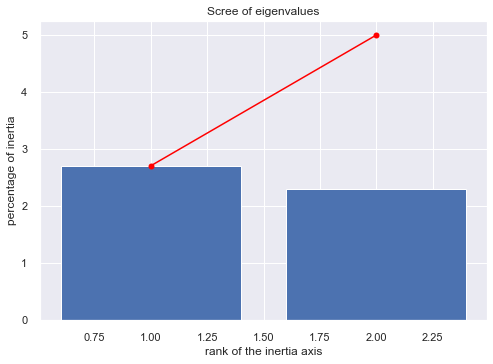

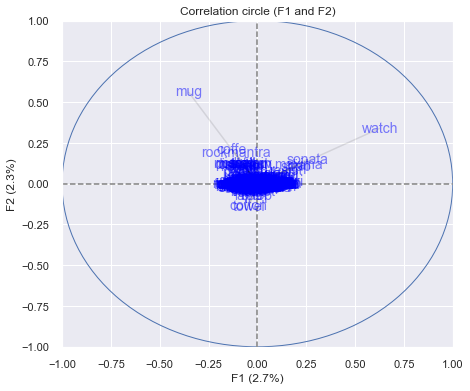

C:\Users\melme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


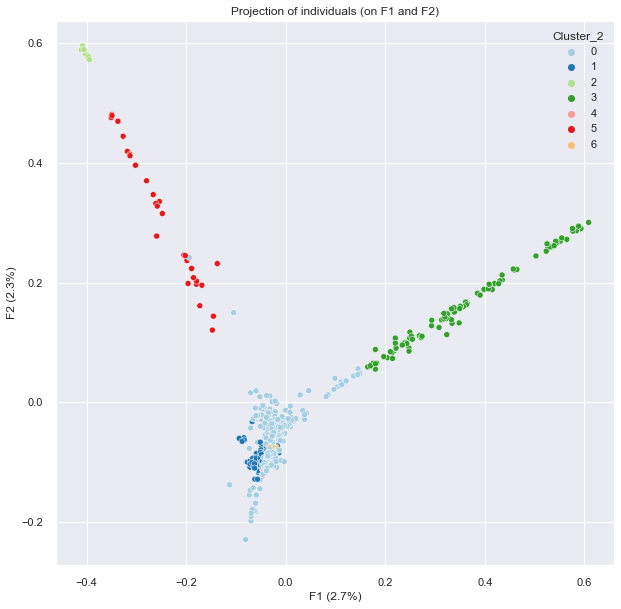

In [30]:
pca(df_tfidf, df_tfidf.columns.tolist(), df['Cluster_2'])

In [31]:
X = df_tfidf.values
features = df_tfidf.columns

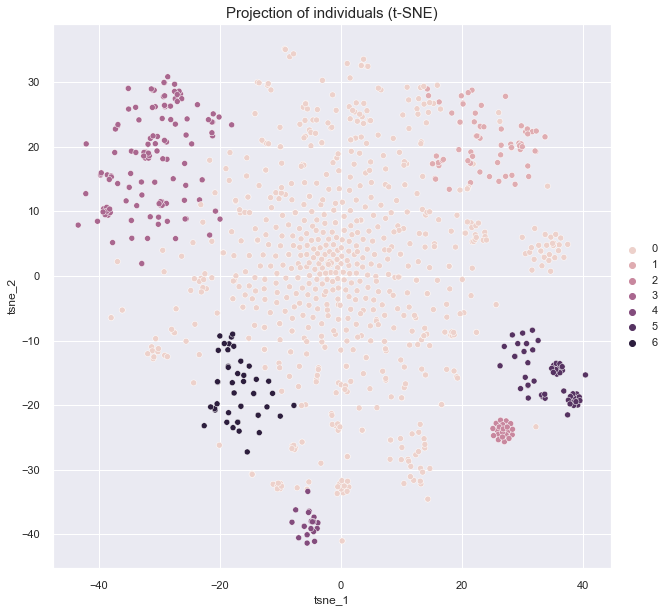

In [32]:
n_components = 2
tsne = TSNE(n_components, random_state=42)
X_tsne = tsne.fit_transform(X)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df['Cluster_2']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Count')

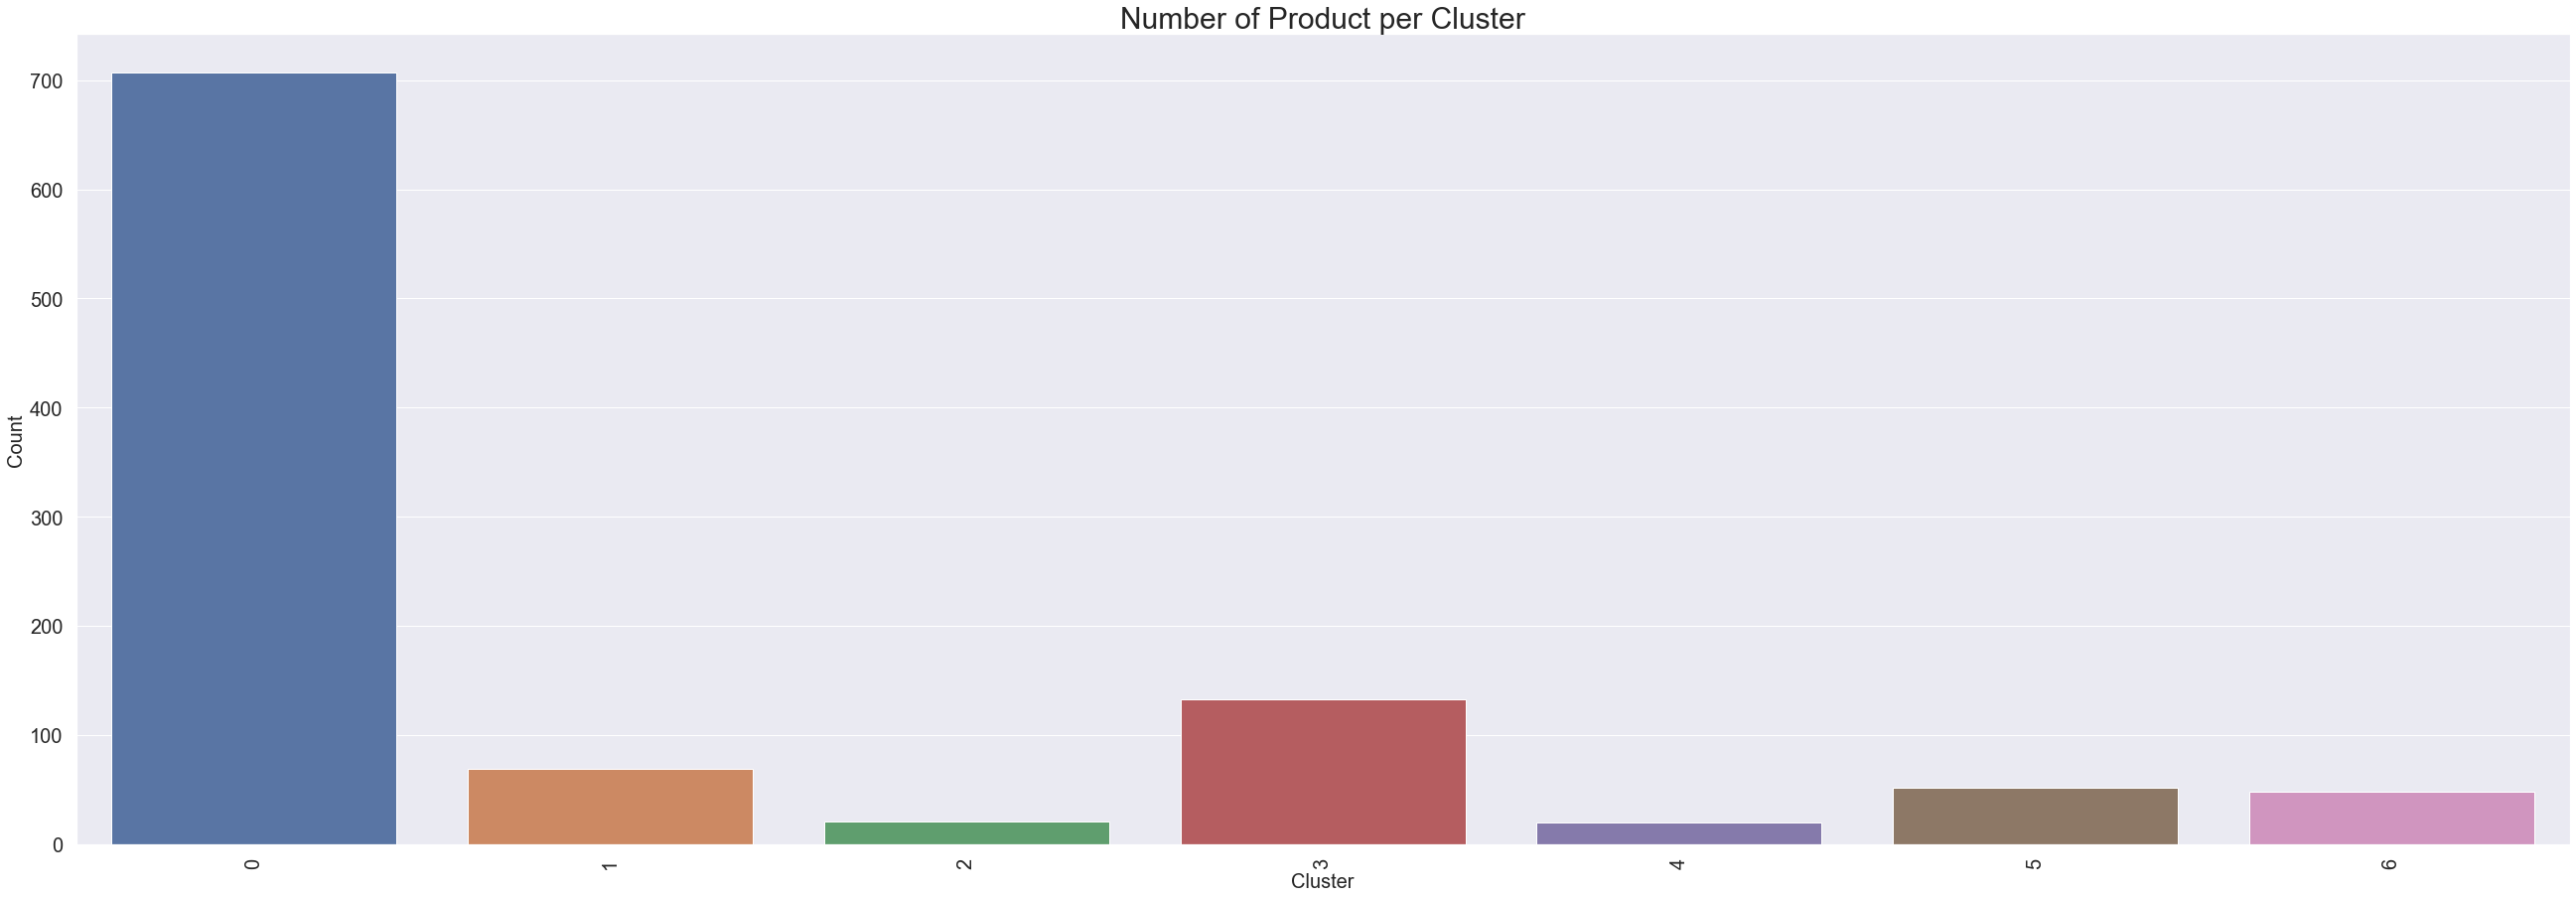

In [33]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_2'].value_counts().index,
            y=df['Cluster_2'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [34]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_2'], df['cat_1']))

ARI :  0.13628438099406234


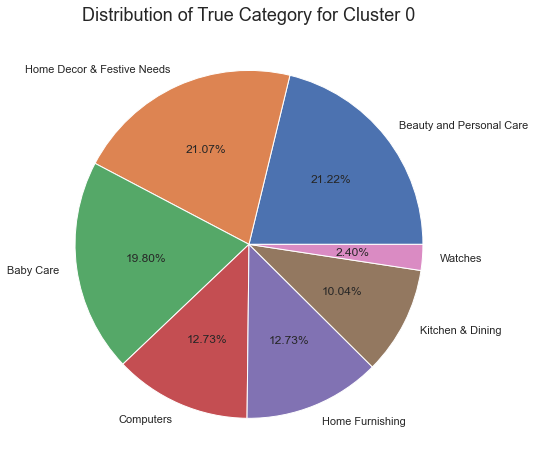

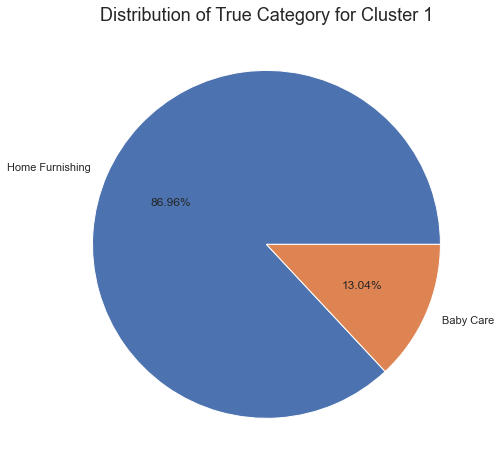

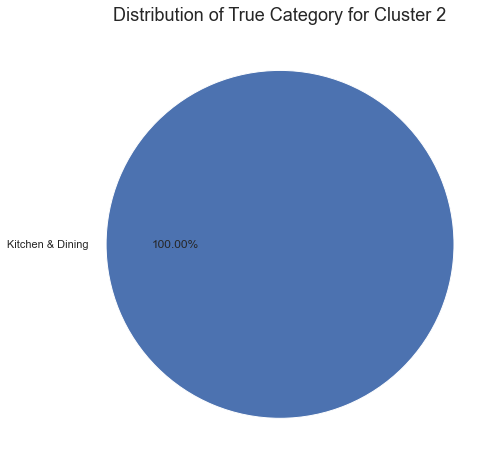

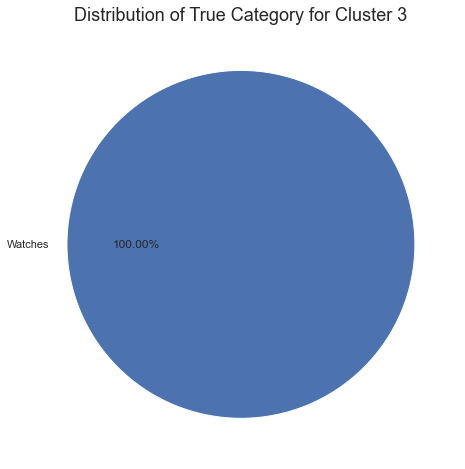

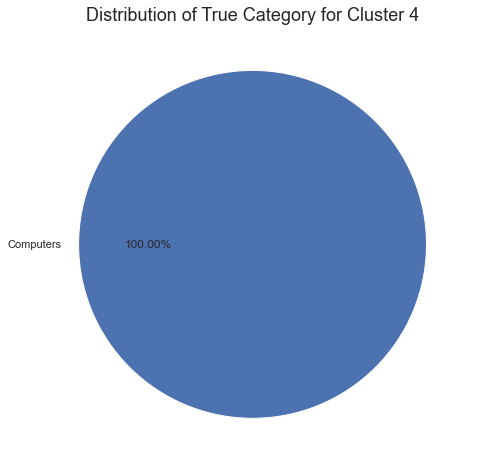

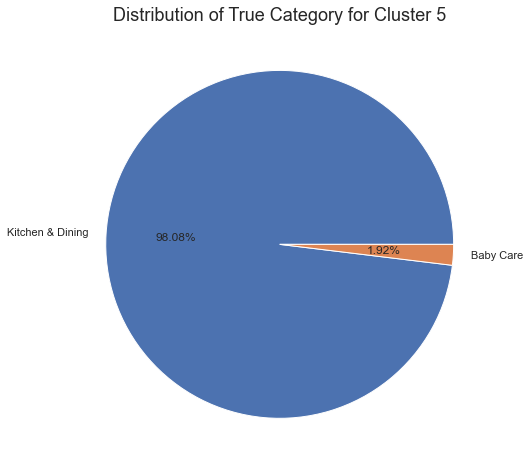

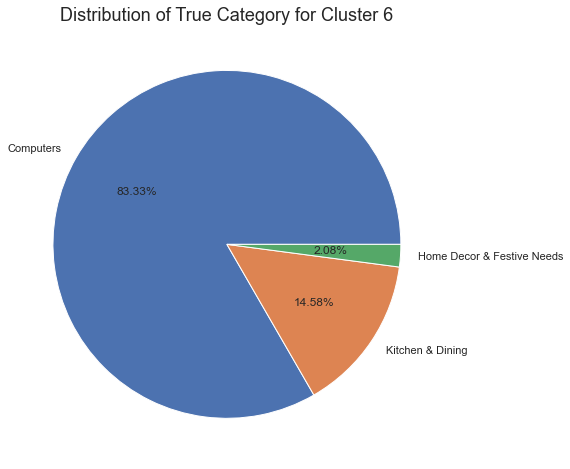

In [35]:
for i in range(7):
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_2'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

#### LDA

In [36]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
X = tfidf.fit_transform(df['description_final'])

In [37]:
n_topics = 7

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=42)

lda.fit(X)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=42)

In [38]:
no_top_words = 10
display_topics(lda, tfidf.get_feature_names(), no_top_words)

Topic 0:
cell hp laptop pavilion lapguard rega deodor edimax anna andr
Topic 1:
towel cotton bath bedsheet pizza glass bodi sheet offer cutter
Topic 2:
sticker mug eyelet polyest aroma abstract curtain blanket vinyl singl
Topic 3:
watch laptop skin dial sonata strap pad mous round maxima
Topic 4:
led usb tenda skin bulb laptop flexibl router trendnet portabl
Topic 5:
cushion usb ganesha kadhai fan vaio lord vgn charger lip
Topic 6:
lowest link playboy handicraft dsl kit lipstick mxofer soap tp


## 3.5. Word Embedding<a class="anchor" id="section_3_5"></a>

### Using pre-trained word embeddings (Newsgroup20)

- In this section, we will to train a text classification model that uses pre-trained word embeddings.
- First, with the preprocessed 'description' column, then with the column 'description' not preprocessed.

#### description_final

In [39]:
df_g = df.copy()

In [40]:
from_category_to_index = {w:i for i,w in enumerate(df_g.cat_1.unique())}
from_index_to_category = {i:w for i,w in enumerate(df_g.cat_1.unique())}

df_g['labels'] = df_g.cat_1.map({w:i for i,w in enumerate(df_g.cat_1.unique())})

In [41]:
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [42]:
samples = df_g['description_final'].values
labels = df_g['labels'].values

In [43]:
df_g = df_g.sample(frac=1, random_state=42)

validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [44]:
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=500)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [45]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [46]:
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
myfile = wget.download(url)

100% [......................................................................] 862182613 / 862182613

In [47]:
with zipfile.ZipFile(myfile, 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [48]:
embeddings_index = {}
with open('C:/tmp/glove/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [49]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 1711 words (673 misses)


In [50]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,)

In [51]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(df_g.labels.nunique(), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 100)         238600    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         82048 

In [52]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [53]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
7/7 [==============================] - 4s 431ms/step - loss: 1.9045 - acc: 0.1952 - val_loss: 1.9770 - val_acc: 0.0762
Epoch 2/20
7/7 [==============================] - 2s 354ms/step - loss: 1.7865 - acc: 0.3167 - val_loss: 1.9376 - val_acc: 0.0952
Epoch 3/20
7/7 [==============================] - 2s 326ms/step - loss: 1.6229 - acc: 0.3643 - val_loss: 1.8044 - val_acc: 0.1476
Epoch 4/20
7/7 [==============================] - 2s 348ms/step - loss: 1.3494 - acc: 0.5107 - val_loss: 1.4629 - val_acc: 0.3857
Epoch 5/20
7/7 [==============================] - 2s 354ms/step - loss: 1.0286 - acc: 0.6595 - val_loss: 1.2258 - val_acc: 0.5571
Epoch 6/20
7/7 [==============================] - 2s 357ms/step - loss: 0.8098 - acc: 0.7417 - val_loss: 1.2124 - val_acc: 0.5952
Epoch 7/20
7/7 [==============================] - 2s 357ms/step - loss: 0.6640 - acc: 0.7857 - val_loss: 1.0565 - val_acc: 0.6619
Epoch 8/20
7/7 [==============================] - 2s 353ms/step - loss: 0.5138 - acc: 0.85

In [54]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(df_g['description_final'])

In [55]:
indexes_pred = np.argmax(probabilities, axis=1)

In [56]:
df_g['index_pred'] = indexes_pred

In [57]:
df['Cluster_3'] = df_g.index_pred.map(lambda i: from_index_to_category[i])

Text(0, 0.5, 'Count')

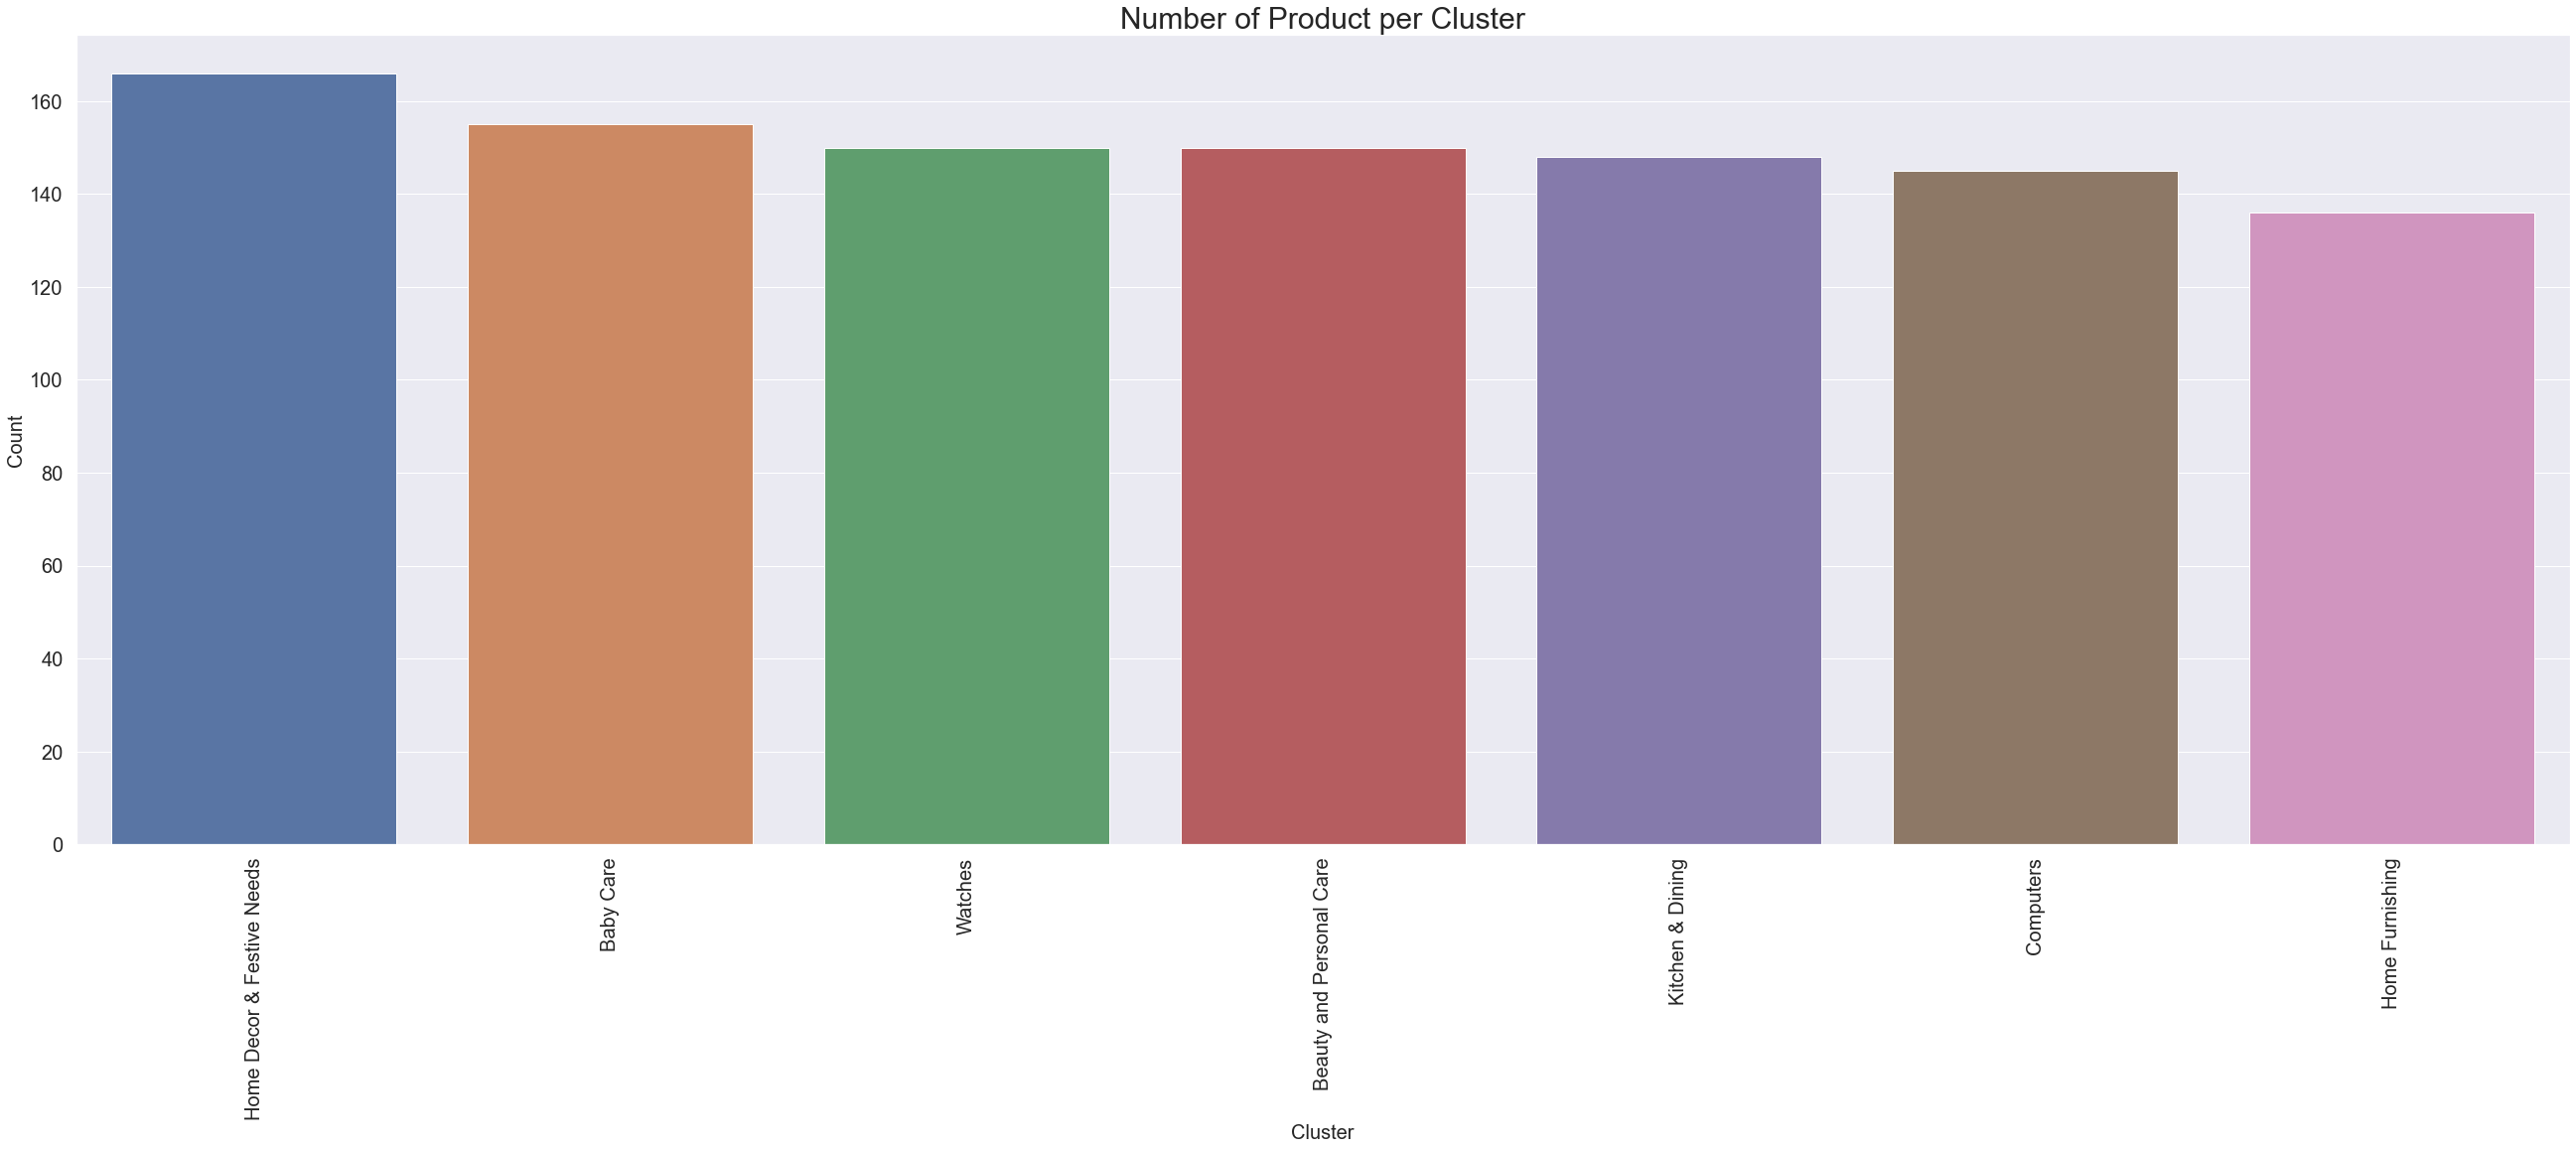

In [58]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_3'].value_counts().index,
            y=df['Cluster_3'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [59]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_3'], df['cat_1']))

ARI :  0.8448987372978035


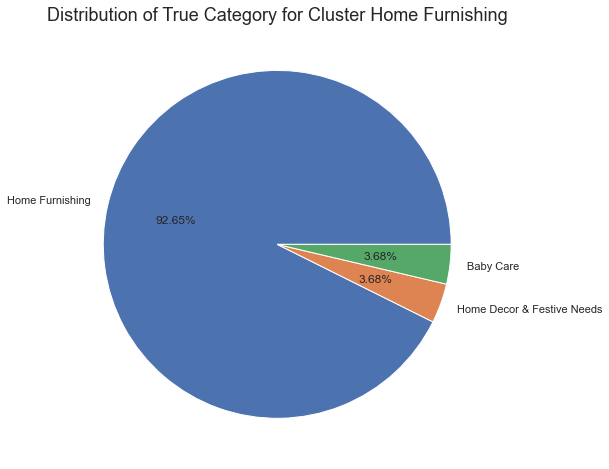

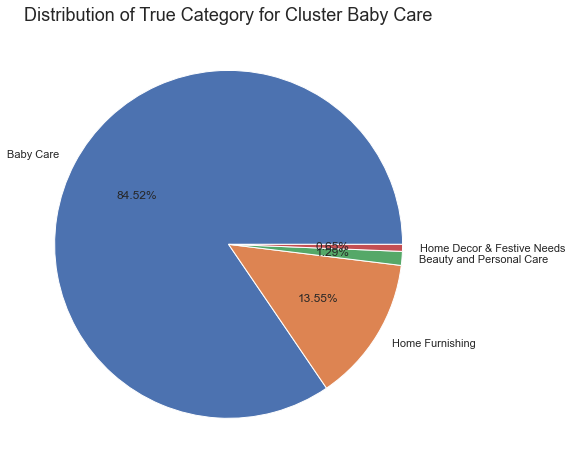

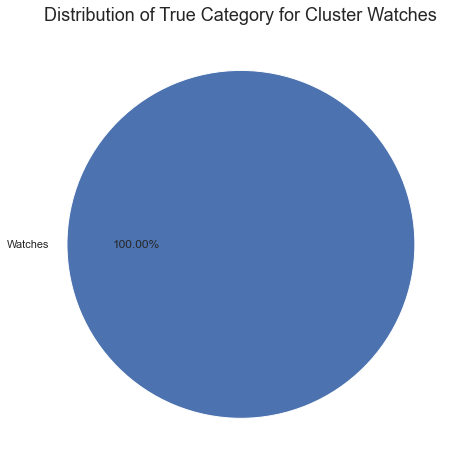

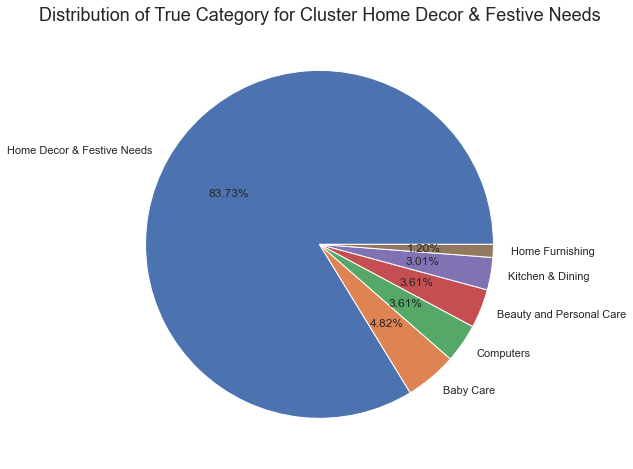

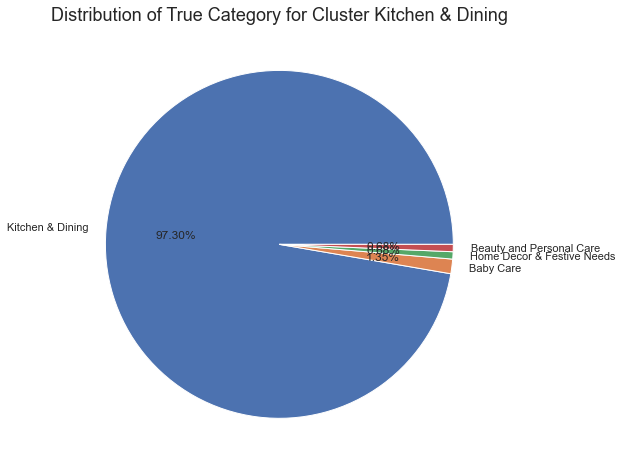

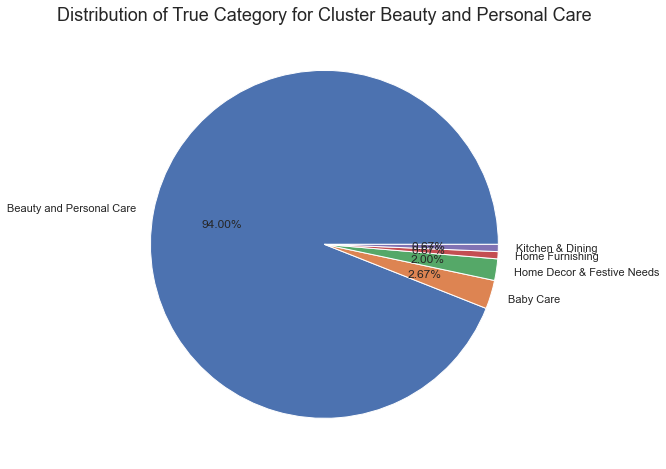

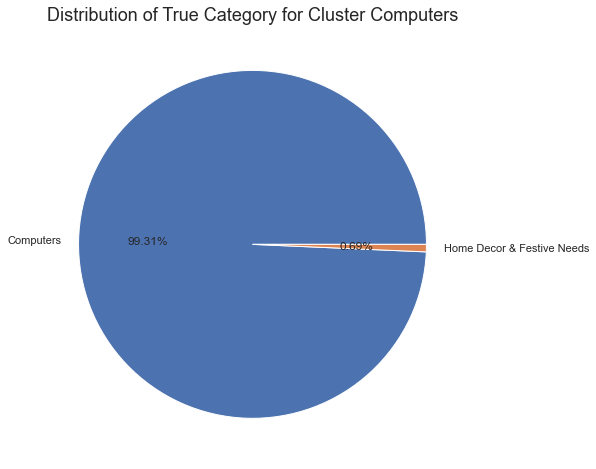

In [60]:
for i in df['Cluster_3'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + i, size=18)
    df[df['Cluster_3'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

#### description

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
df_g = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [63]:
from_category_to_index = {w:i for i,w in enumerate(df.cat_1.unique())}
from_index_to_category = {i:w for i,w in enumerate(df.cat_1.unique())}

df_g['labels'] = df.cat_1.map({w:i for i,w in enumerate(df.cat_1.unique())})

In [64]:
df_g['description_c'] = df_g.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)

In [65]:
df_g['description_f'] = df_g['description_c'].apply(lambda x: ' '.join(x))

In [66]:
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [67]:
samples = df_g['description_f'].values
labels = df_g['labels'].values

In [68]:
df_g = df_g.sample(frac=1, random_state=42)

validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [69]:
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=500)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [70]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [71]:
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
myfile = wget.download(url)

100% [......................................................................] 862182613 / 862182613

In [72]:
with zipfile.ZipFile(myfile, 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [73]:
embeddings_index = {}
with open('C:/tmp/glove/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [74]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 4003 words (1182 misses)


In [75]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,)

In [76]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(df_g.labels.nunique(), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         518700    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         8204

In [77]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [78]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
7/7 [==============================] - 4s 413ms/step - loss: 1.8516 - acc: 0.2595 - val_loss: 1.9854 - val_acc: 0.1048
Epoch 2/20
7/7 [==============================] - 3s 363ms/step - loss: 1.6032 - acc: 0.3964 - val_loss: 1.8079 - val_acc: 0.3381
Epoch 3/20
7/7 [==============================] - 3s 358ms/step - loss: 1.3490 - acc: 0.5036 - val_loss: 1.7325 - val_acc: 0.3857
Epoch 4/20
7/7 [==============================] - 3s 363ms/step - loss: 1.1340 - acc: 0.6107 - val_loss: 1.4600 - val_acc: 0.4714
Epoch 5/20
7/7 [==============================] - 2s 359ms/step - loss: 0.9025 - acc: 0.7071 - val_loss: 1.3770 - val_acc: 0.4524
Epoch 6/20
7/7 [==============================] - 3s 360ms/step - loss: 0.7506 - acc: 0.7357 - val_loss: 1.1525 - val_acc: 0.5857
Epoch 7/20
7/7 [==============================] - 2s 356ms/step - loss: 0.6100 - acc: 0.7976 - val_loss: 1.1813 - val_acc: 0.5619
Epoch 8/20
7/7 [==============================] - 2s 346ms/step - loss: 0.4556 - acc: 0.85

In [79]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(df_g['description_f'])

In [80]:
indexes_pred = np.argmax(probabilities, axis=1)

In [81]:
df_g['index_pred'] = indexes_pred

In [82]:
df['Cluster_4'] = df_g.index_pred.map(lambda i: from_index_to_category[i])

Text(0, 0.5, 'Count')

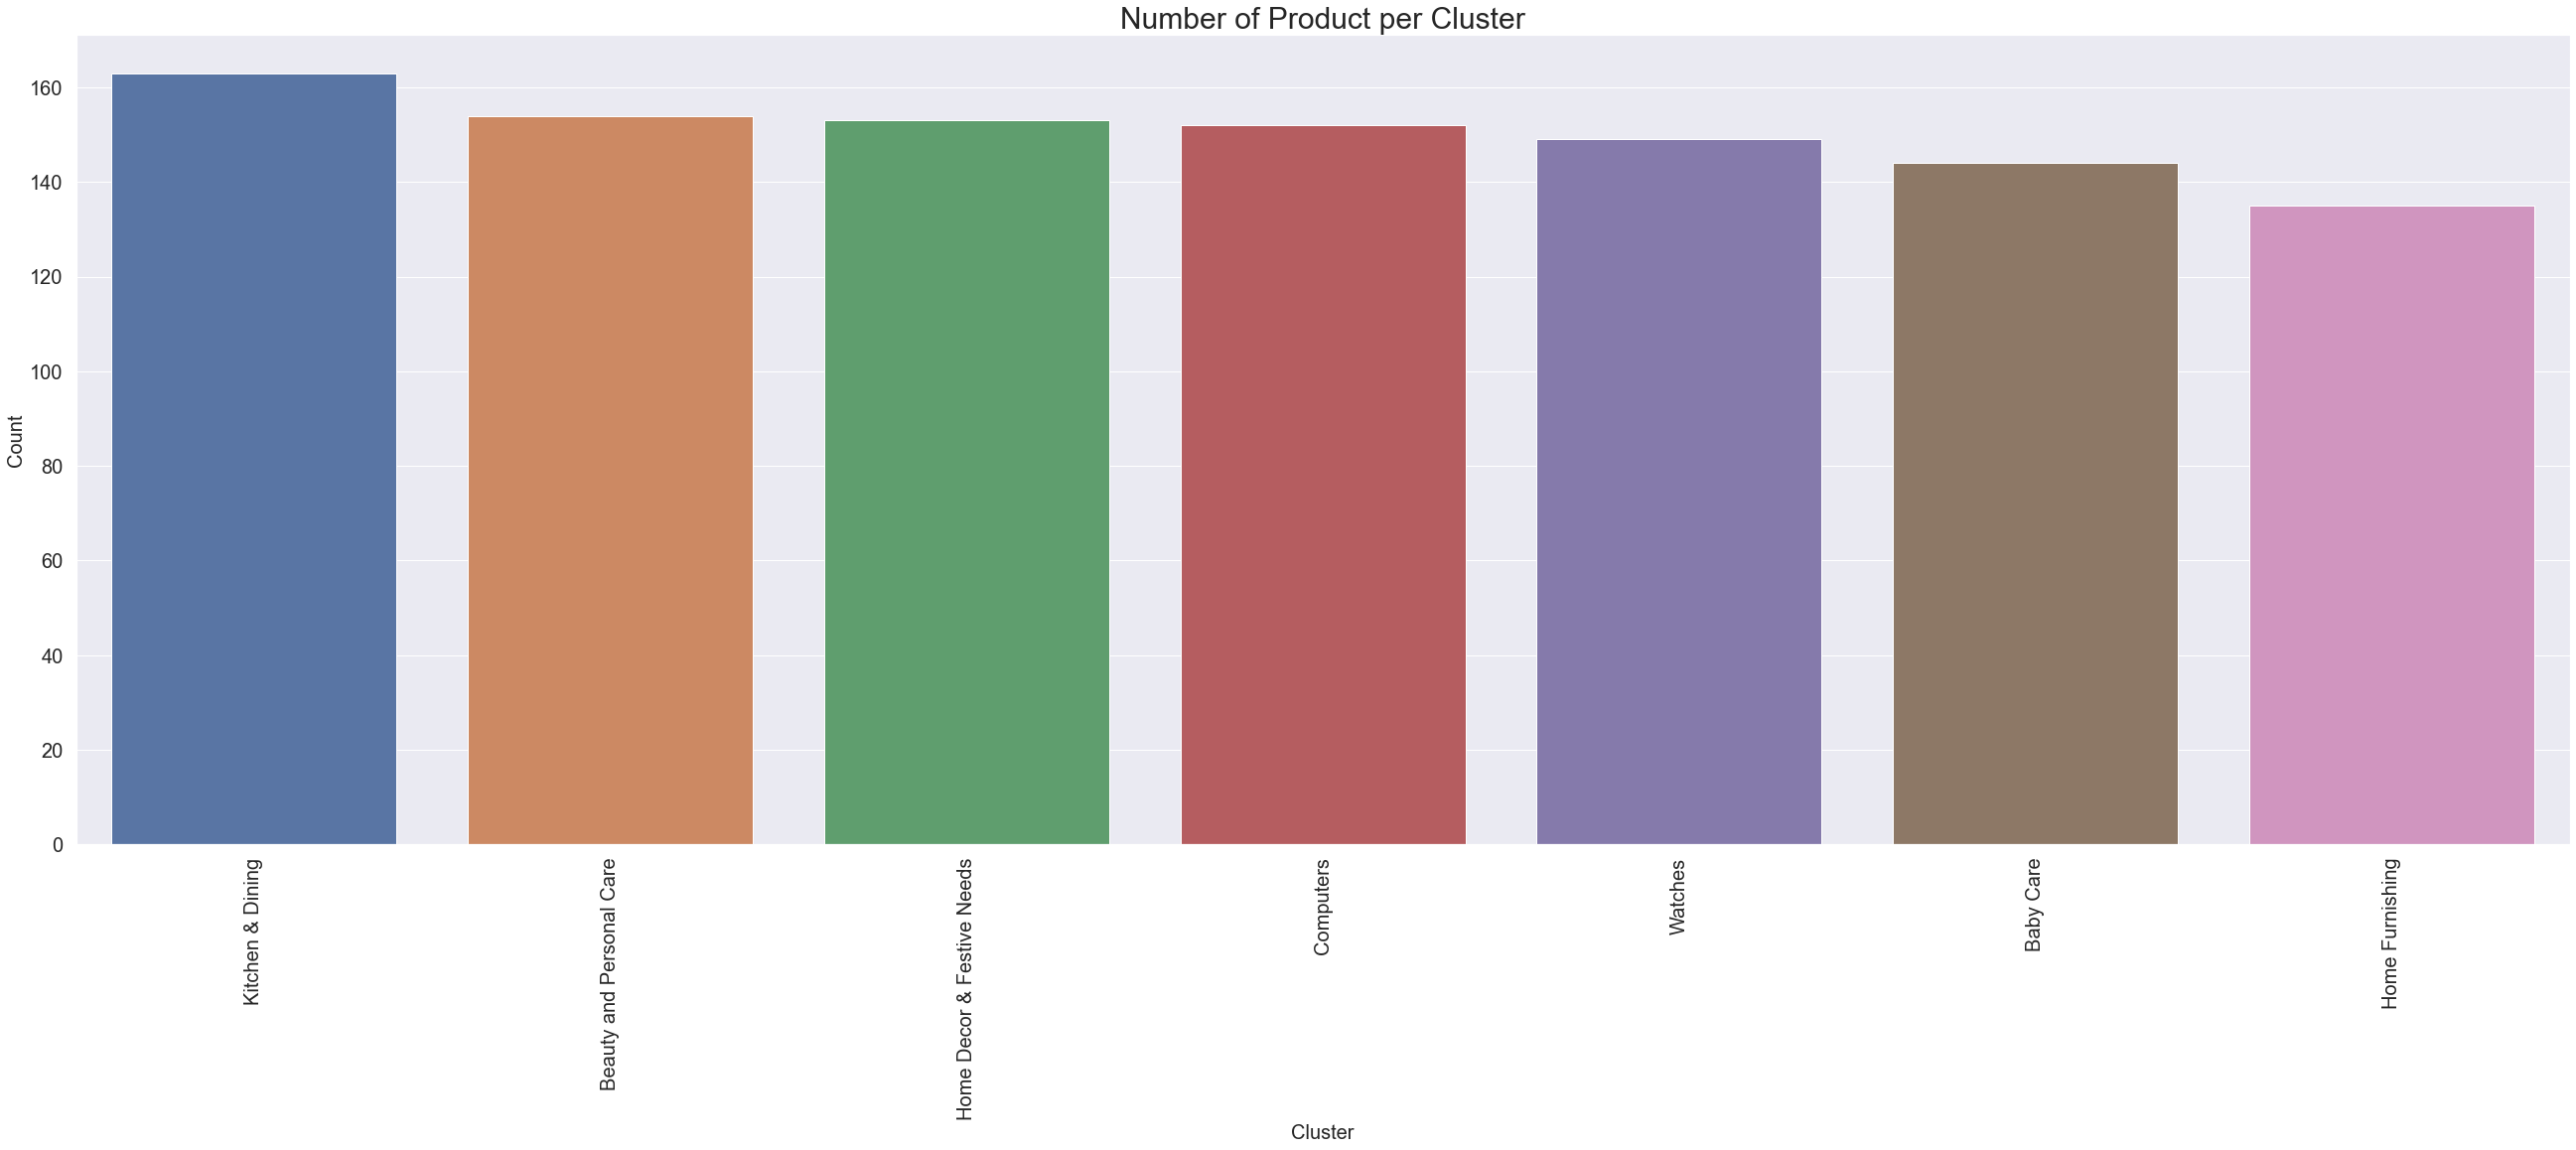

In [83]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_4'].value_counts().index,
            y=df['Cluster_4'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [84]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_4'], df['cat_1']))

ARI :  0.8737875975162884


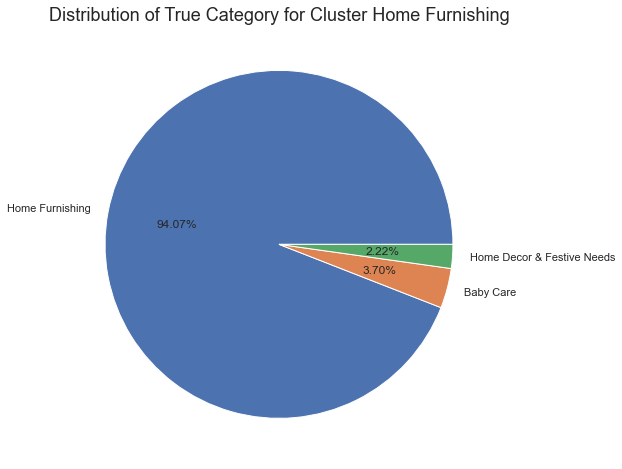

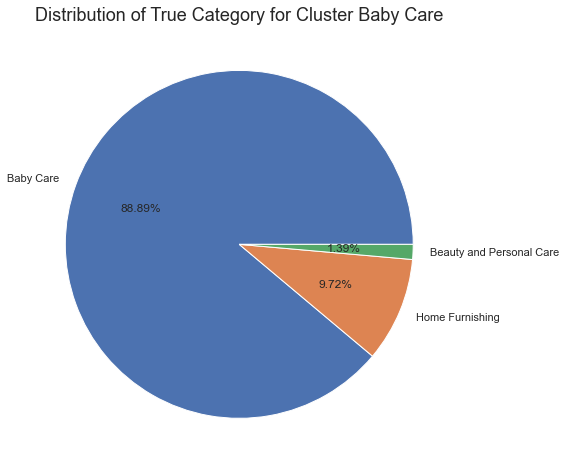

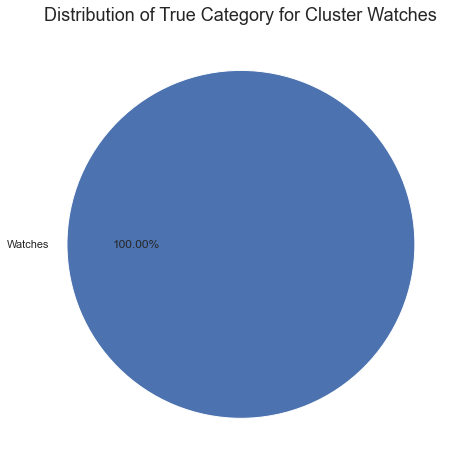

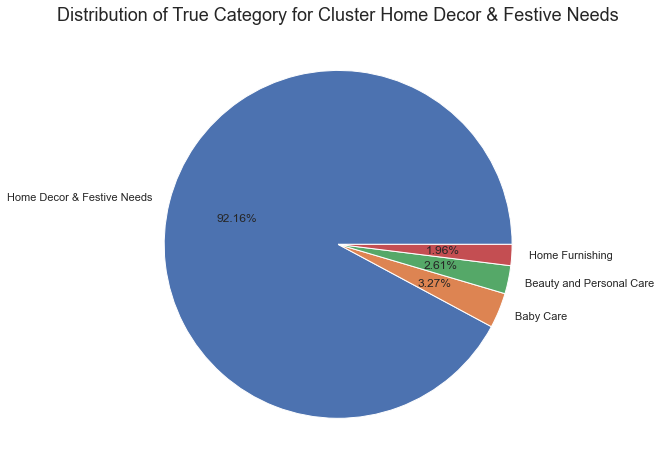

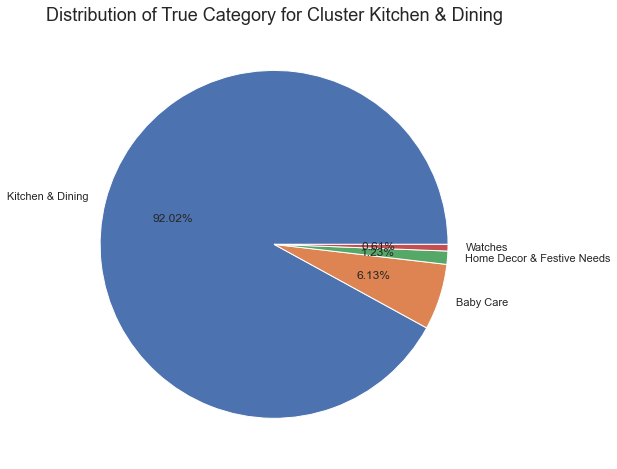

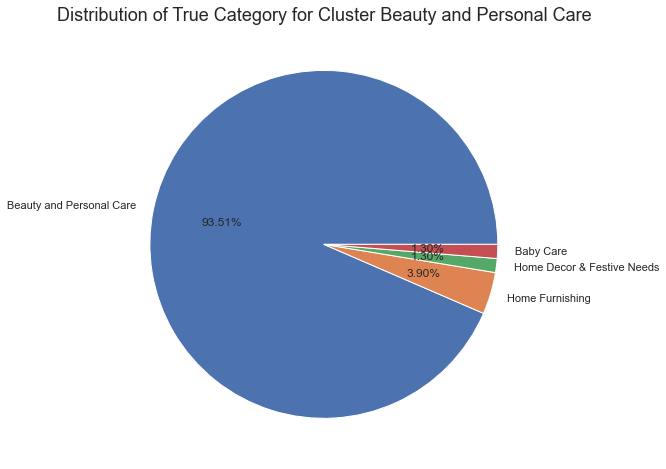

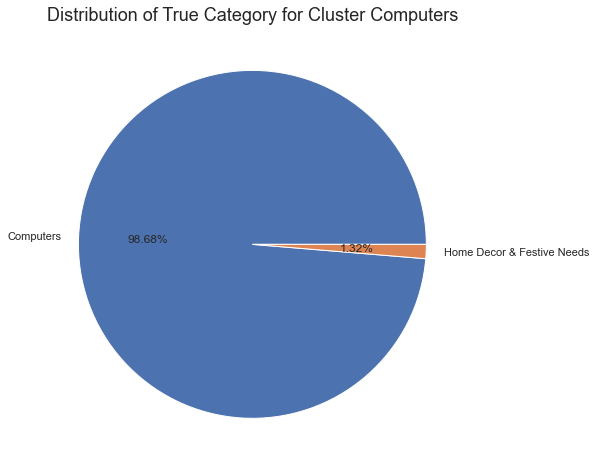

In [85]:
for i in df['Cluster_4'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + i, size=18)
    df[df['Cluster_4'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

### Word2Vec

- In this part, we will train a Word2Vec model, generate word embeddings, and use KMeans to create clusters.
- First, we will use Word2Vec without pretraining and then, we will use a pretrained Word2Vec.

#### Without pre-training

In [86]:
model = Word2Vec(sentences=df['description_clean'], size=100, workers=1, seed=42)

In [87]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [88]:
vectorized_docs = vectorize(df['description_clean'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 100)

In [89]:
def kmeans_clusters(
    X, 
    k, 
    print_silhouette_values,):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [90]:
clustering, cluster_labels = kmeans_clusters(
    X=vectorized_docs,
    k=7,
    print_silhouette_values=True)


df_clusters = pd.DataFrame({
    "text": df['description_final'],
    "tokens": [" ".join(text) for text in df['description_clean']],
    "cluster": cluster_labels})

For n_clusters = 7
Silhouette coefficient: 0.53
Inertia:19.883362553487924
Silhouette values:
    Cluster 5: Size:65 | Avg:0.80 | Min:0.09 | Max: 0.90
    Cluster 3: Size:50 | Avg:0.58 | Min:0.02 | Max: 0.74
    Cluster 4: Size:114 | Avg:0.54 | Min:-0.00 | Max: 0.74
    Cluster 2: Size:272 | Avg:0.53 | Min:0.02 | Max: 0.73
    Cluster 0: Size:276 | Avg:0.53 | Min:0.03 | Max: 0.72
    Cluster 1: Size:72 | Avg:0.49 | Min:0.01 | Max: 0.69
    Cluster 6: Size:201 | Avg:0.45 | Min:-0.02 | Max: 0.65


In [91]:
df['Cluster_5'] = df_clusters['cluster']

Text(0, 0.5, 'Count')

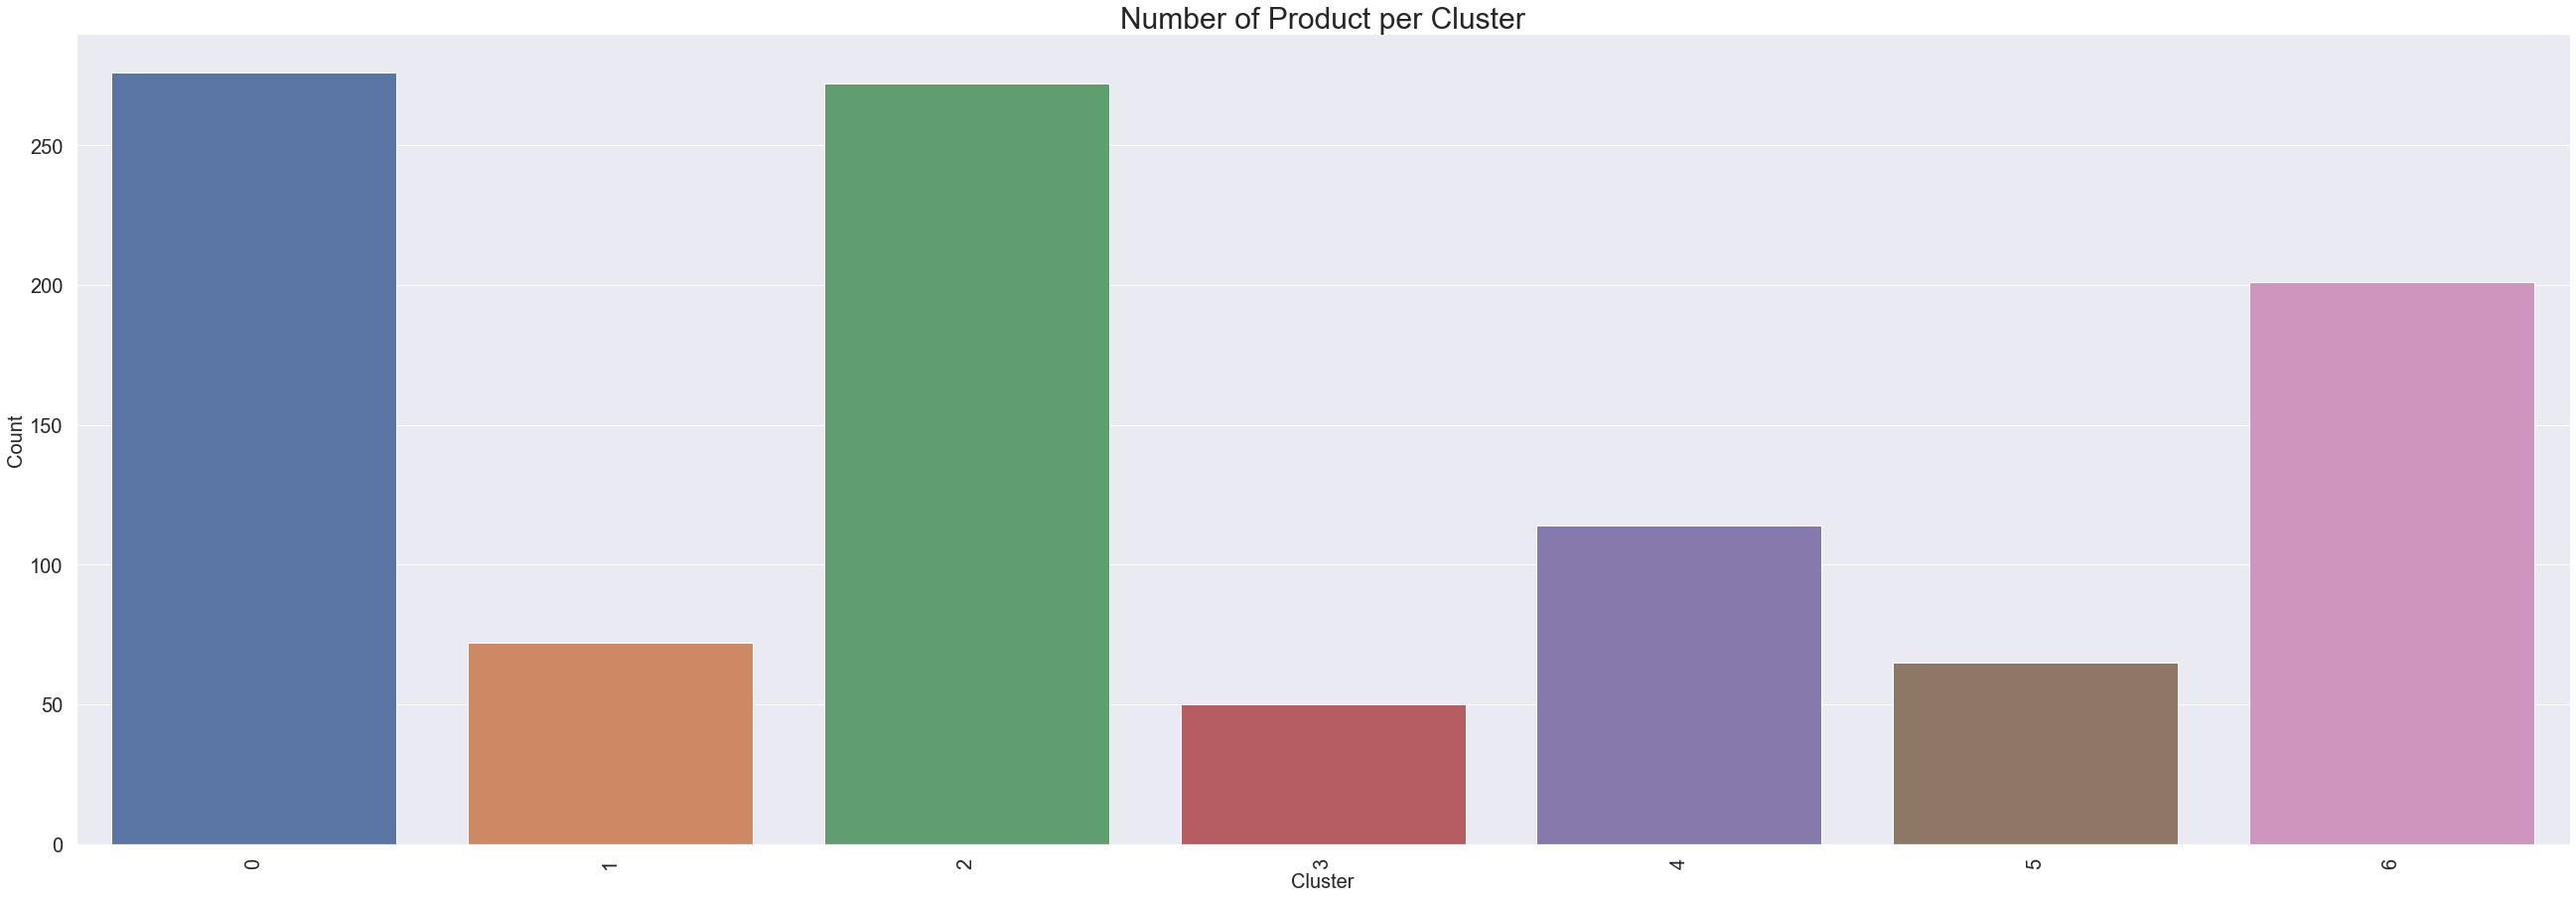

In [92]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_5'].value_counts().index,
            y=df['Cluster_5'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [93]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_5'], df['cat_1']))

ARI :  0.04486038437070844


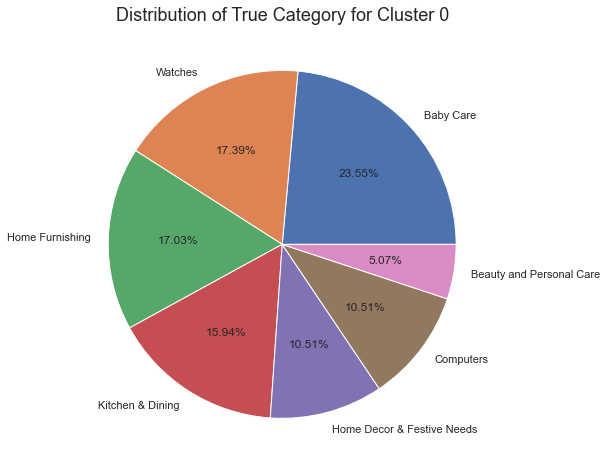

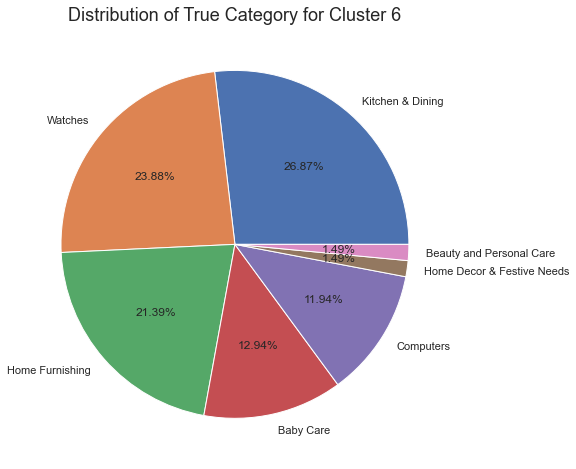

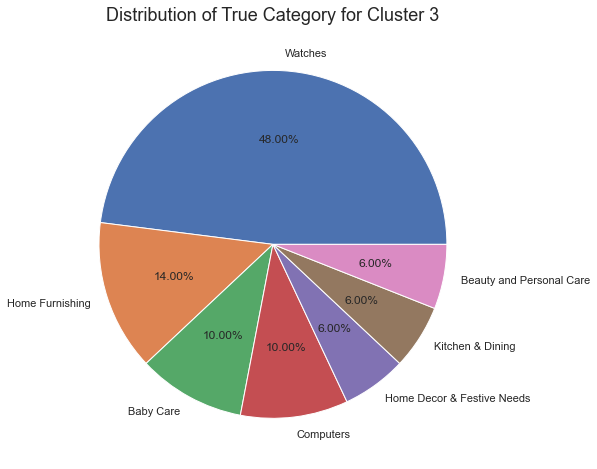

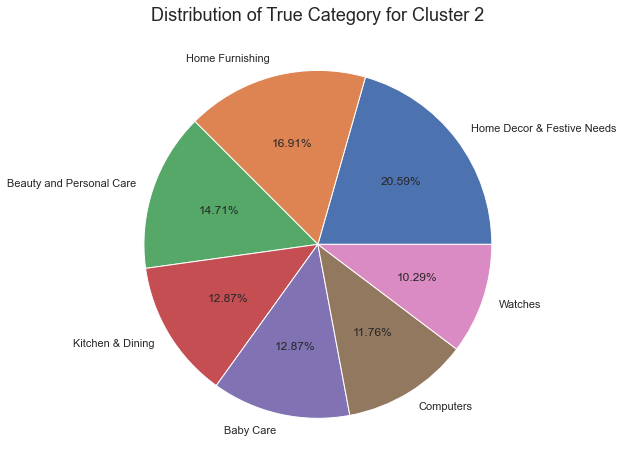

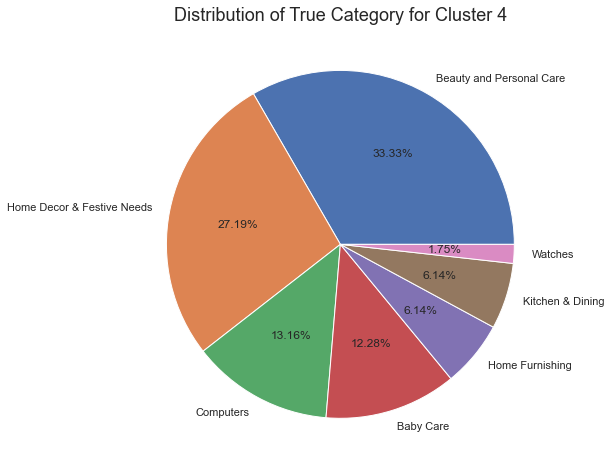

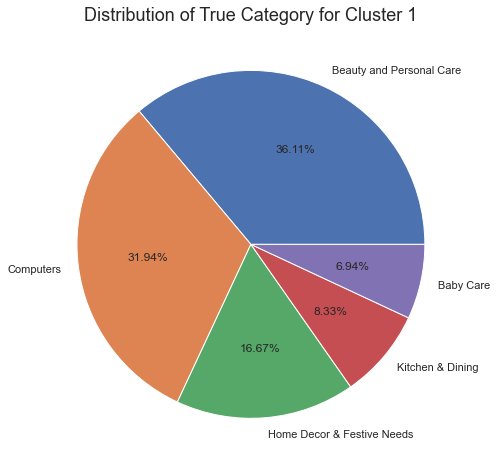

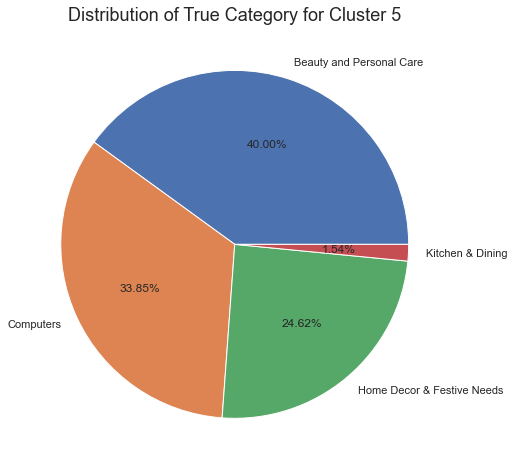

In [94]:
for i in df['Cluster_5'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_5'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

In [95]:
pca = decomposition.PCA(n_components=0.99, random_state=42)
feat_pca = pca.fit_transform(vectorized_docs)

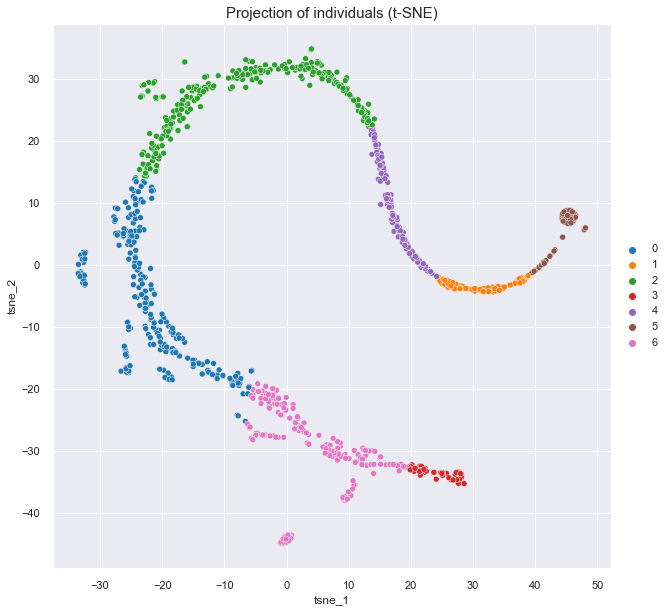

In [96]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(vectorized_docs)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df_clusters['cluster']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result,
                palette=sns.color_palette('tab10', n_colors=7))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### With pre-training

In [97]:
model = Word2Vec(sentences=df['description_clean'], size=100, workers=1, seed=42)

In [98]:
wv = api.load('glove-wiki-gigaword-100')

In [99]:
def vectorize_pt(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in wv:
                try:
                    vectors.append(wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [100]:
vectorized_docs = vectorize_pt(df['description_clean'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 100)

In [101]:
clustering, cluster_labels = kmeans_clusters(
    X=vectorized_docs,
    k=7,
    print_silhouette_values=True)


df_clusters = pd.DataFrame({
    "text": df['description_final'],
    "tokens": [" ".join(text) for text in df['description_clean']],
    "cluster": cluster_labels})

For n_clusters = 7
Silhouette coefficient: 0.07
Inertia:5321.995771849175
Silhouette values:
    Cluster 3: Size:41 | Avg:0.22 | Min:-0.03 | Max: 0.47
    Cluster 0: Size:367 | Avg:0.11 | Min:0.02 | Max: 0.22
    Cluster 5: Size:87 | Avg:0.10 | Min:-0.11 | Max: 0.23
    Cluster 6: Size:188 | Avg:0.07 | Min:-0.03 | Max: 0.20
    Cluster 1: Size:47 | Avg:0.07 | Min:-0.05 | Max: 0.26
    Cluster 4: Size:100 | Avg:0.01 | Min:-0.15 | Max: 0.13
    Cluster 2: Size:220 | Avg:0.01 | Min:-0.07 | Max: 0.11


In [102]:
df['Cluster_6'] = df_clusters['cluster']

Text(0, 0.5, 'Count')

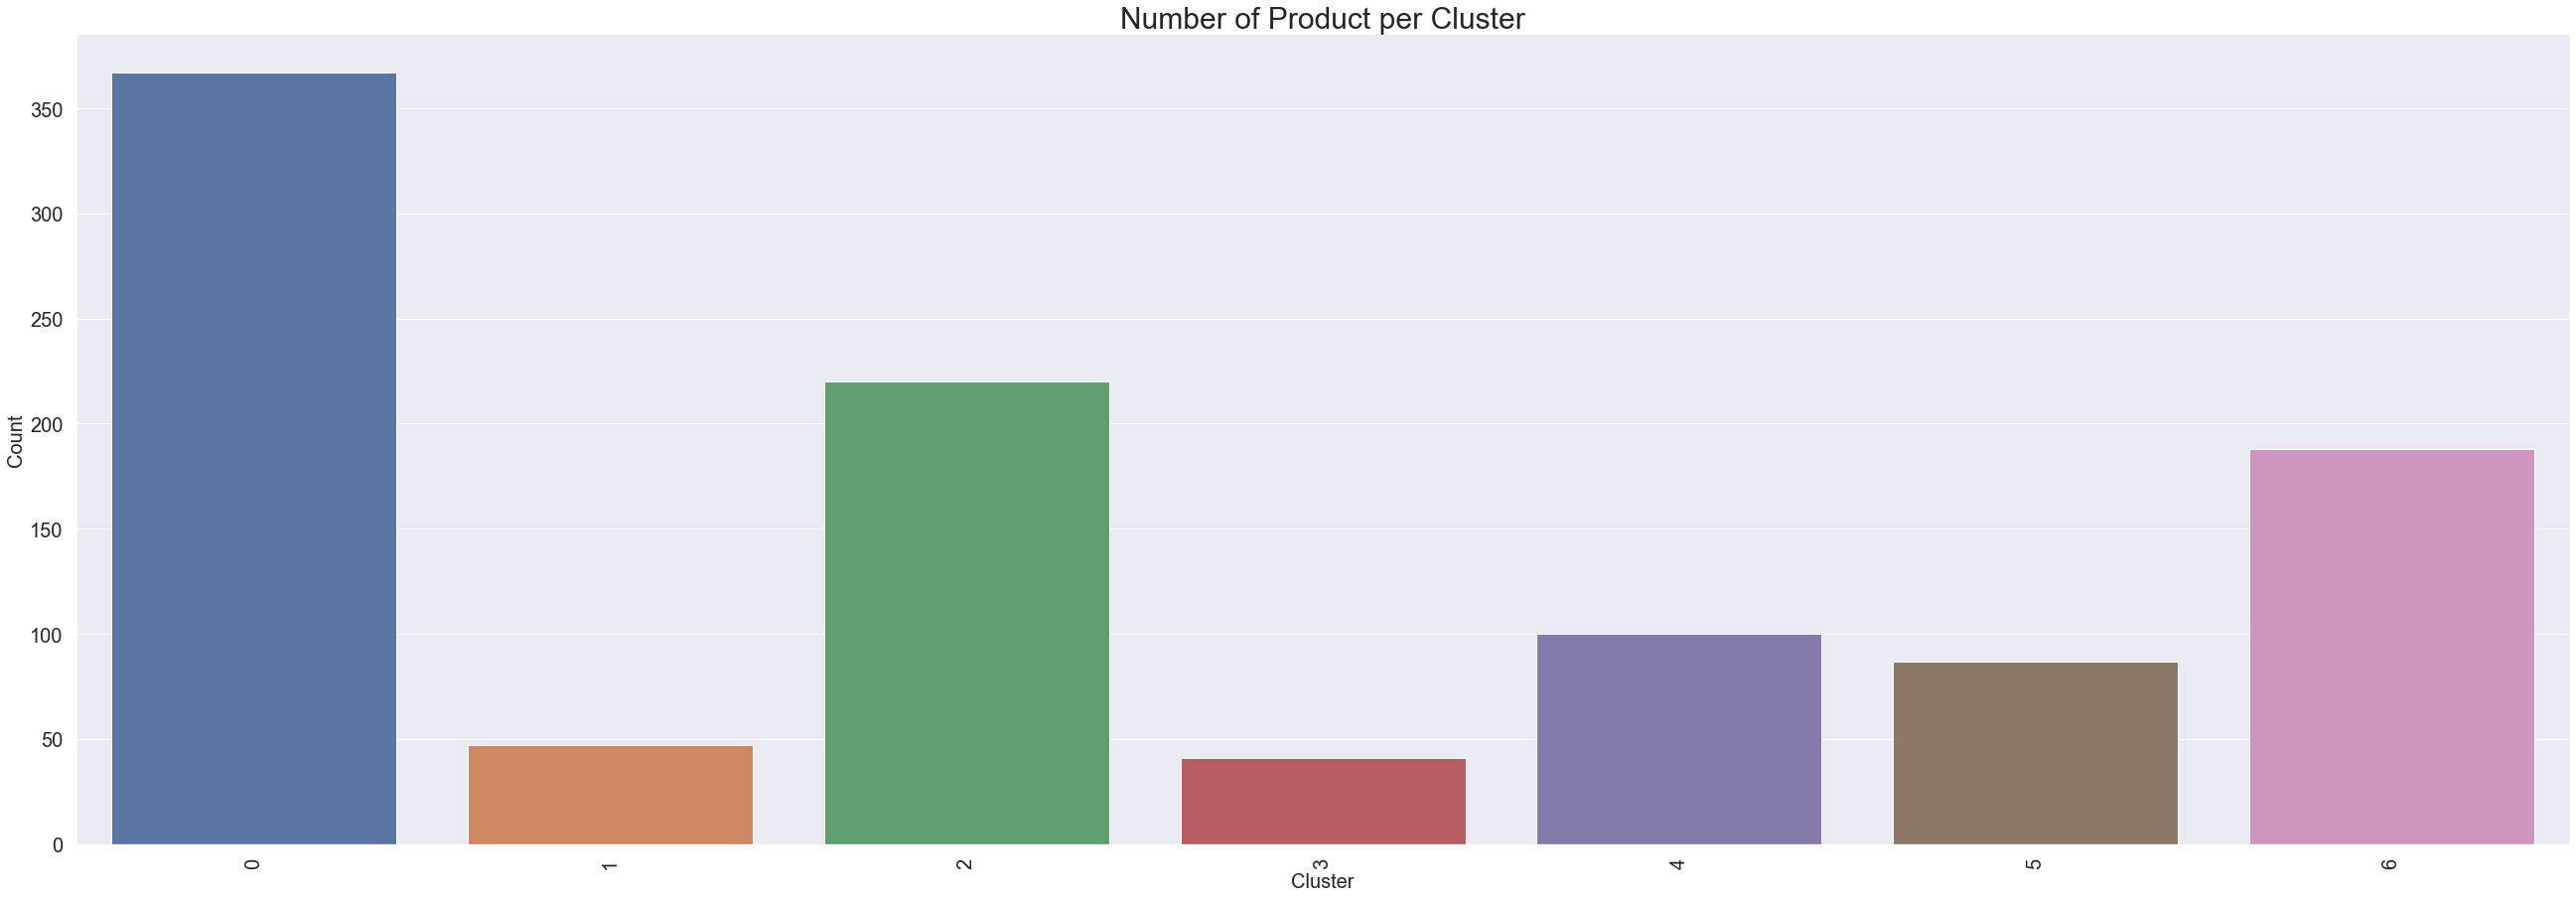

In [103]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_6'].value_counts().index,
            y=df['Cluster_6'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [104]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_6'], df['cat_1']))

ARI :  0.15442669414397062


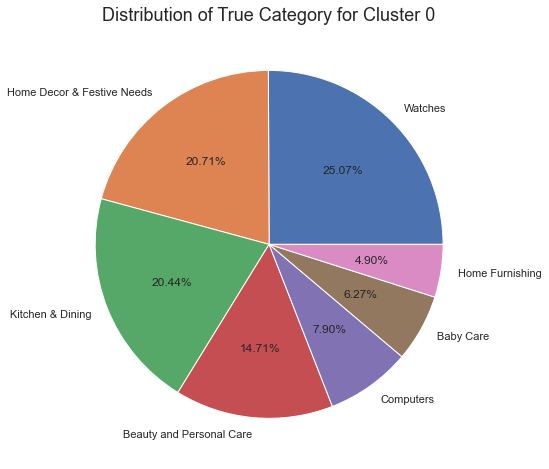

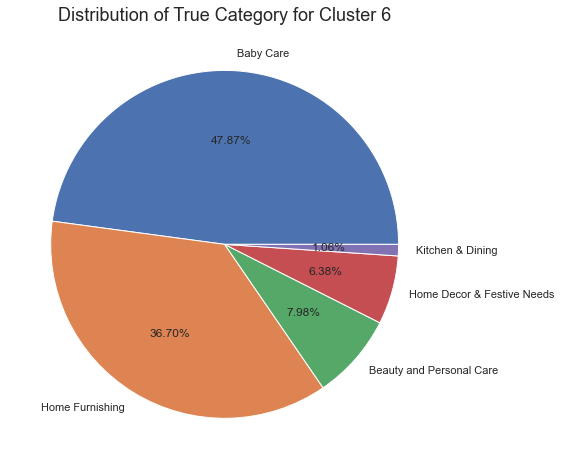

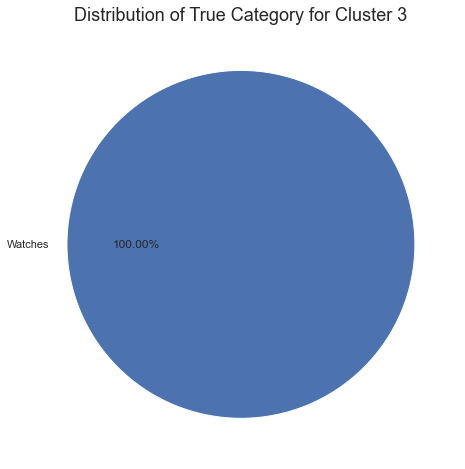

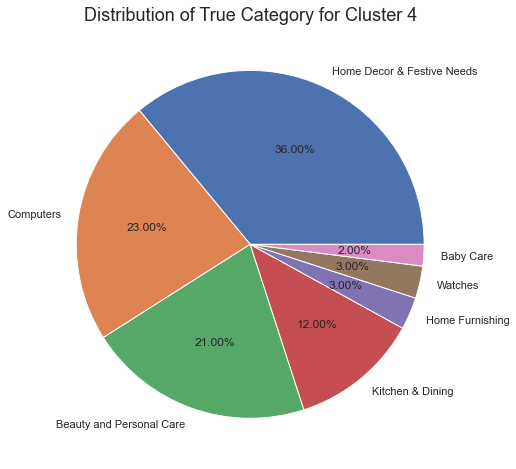

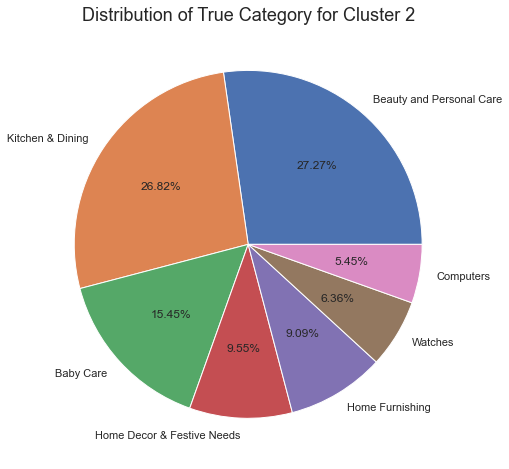

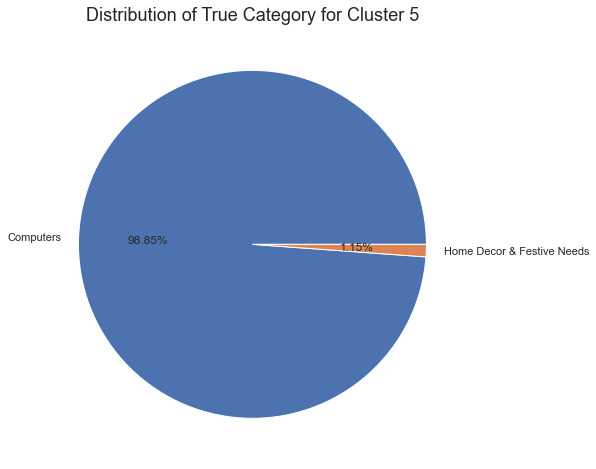

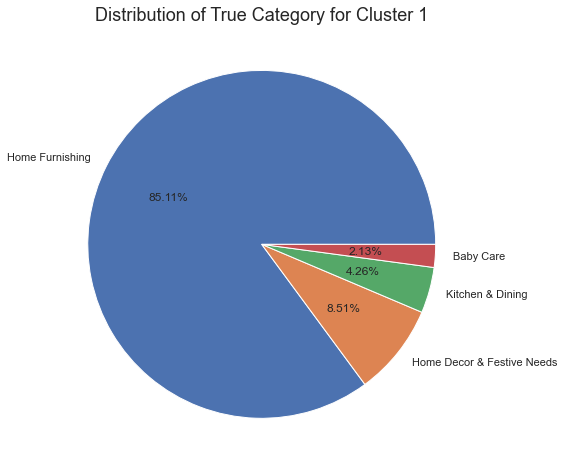

In [105]:
for i in df['Cluster_6'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_6'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

In [106]:
pca = decomposition.PCA(n_components=0.99, random_state=42)
feat_pca = pca.fit_transform(vectorized_docs)

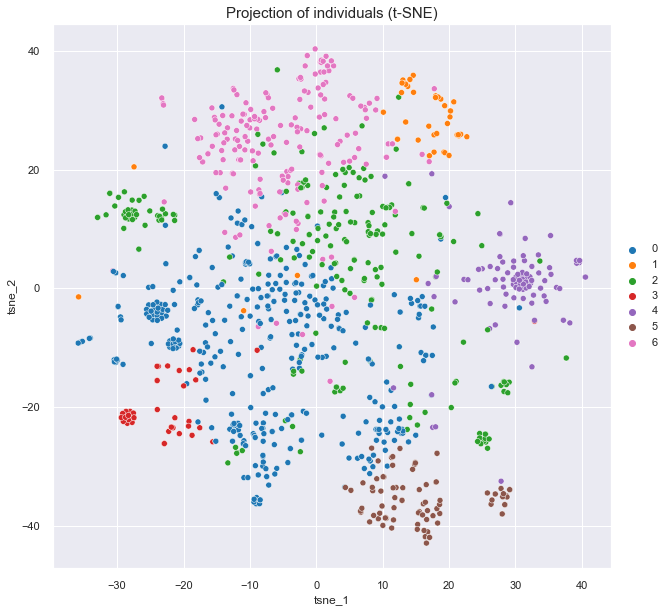

In [107]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(vectorized_docs)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df_clusters['cluster']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result,
                palette=sns.color_palette('tab10', n_colors=7))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## 3.6. Supervised<a class="anchor" id="section_3_6"></a>

In this part, we will perform a supervised classification.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df['description_final'], df['cat_1'], test_size=0.2, random_state=42)

In [109]:
vectoriser = TfidfVectorizer()
X_train_tfidf = vectoriser.fit_transform(X_train)

In [110]:
sgd_clf = SGDClassifier(random_state=42)

In [111]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}

search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=5)
search.fit(X_train_tfidf, y_train)
search.best_params_

C:\Users\melme\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


{'early_stopping': False,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'l2'}

In [112]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, X_train_tfidf, y_train, cv=5)
print(grid_sgd_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_sgd_clf_scores.mean(), grid_sgd_clf_scores.std() * 2))

[0.92261905 0.91666667 0.89285714 0.92261905 0.91071429]
Accuracy: 0.91 (+/- 0.02)


In [113]:
pipe = Pipeline([('vectoriser', vectoriser),
                 ('classifier', search.best_estimator_)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectoriser', TfidfVectorizer()),
                ('classifier',
                 SGDClassifier(fit_intercept=False, loss='log',
                               random_state=42))])

In [114]:
y_test_pred = pipe.predict(X_test)
print("Accuracy: %0.2f" % (accuracy_score(y_test, y_test_pred)))
conf_mat = confusion_matrix(y_test, y_test_pred)

Accuracy: 0.93


<AxesSubplot:>

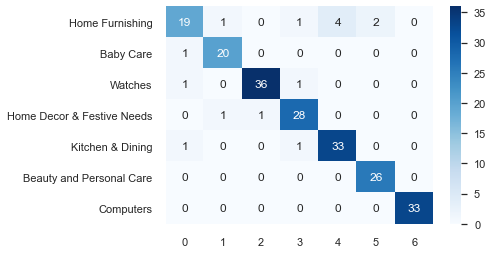

In [115]:
df_cm = pd.DataFrame(conf_mat, index=[label for label in df['cat_1'].unique().tolist()],
                     columns = [i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [116]:
y_pred = pipe.predict(df['description_final'])

In [117]:
df['Cluster_7'] = pipe.predict(df['description_final'])

Text(0, 0.5, 'Count')

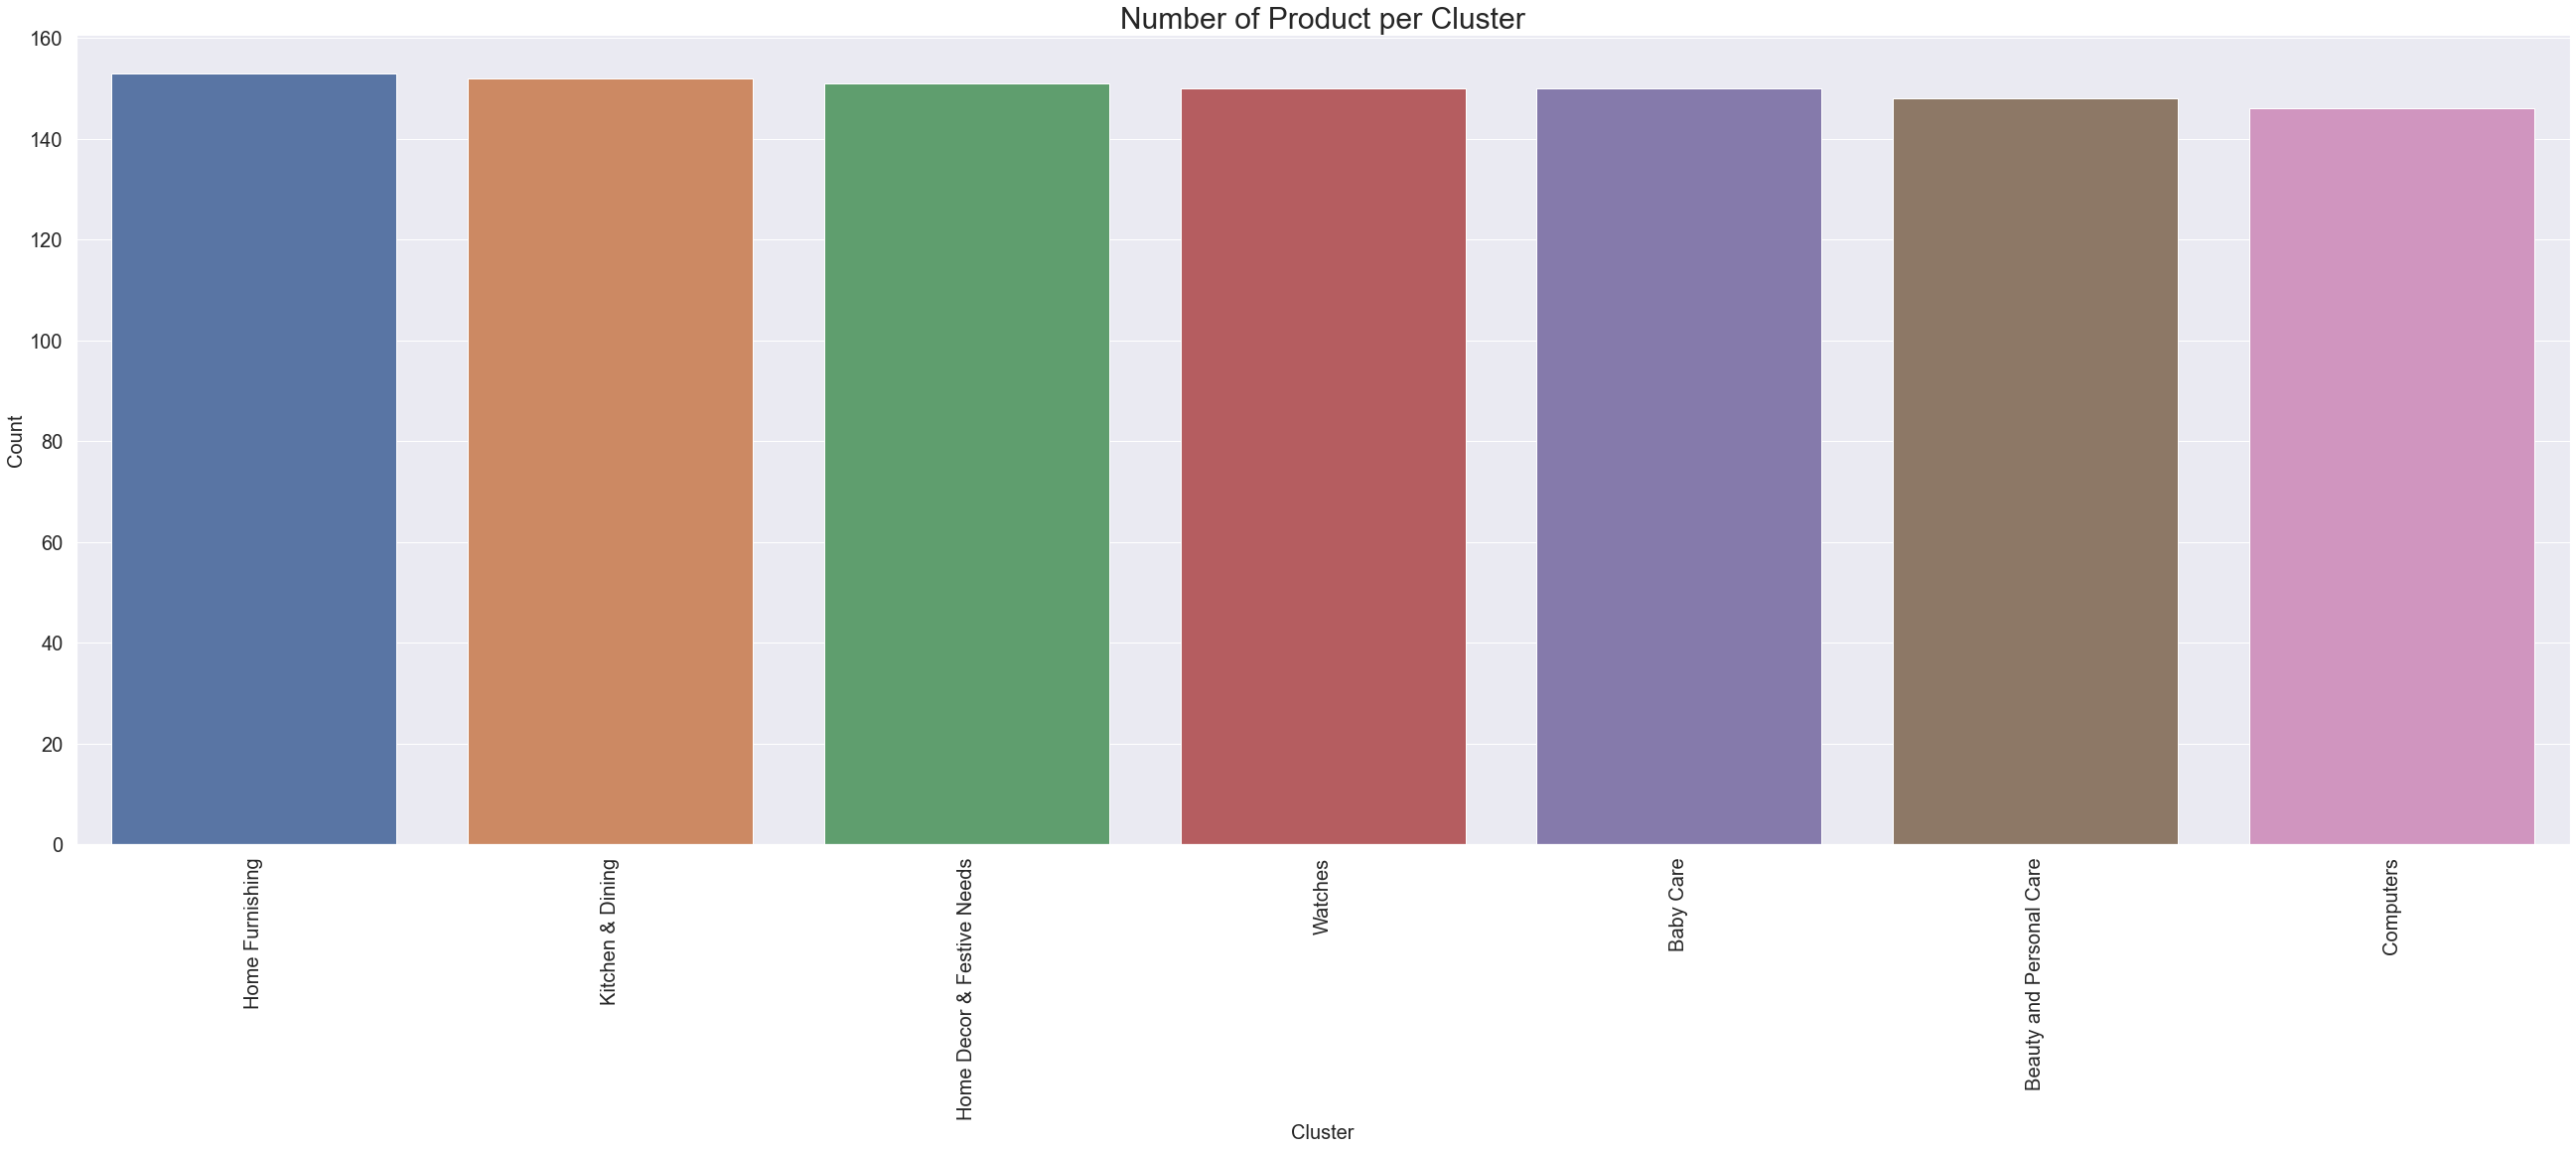

In [118]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_7'].value_counts().index,
            y=df['Cluster_7'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [119]:
print("ARI : ", metrics.adjusted_rand_score(df['Cluster_7'], df['cat_1']))

ARI :  0.9521826603030851


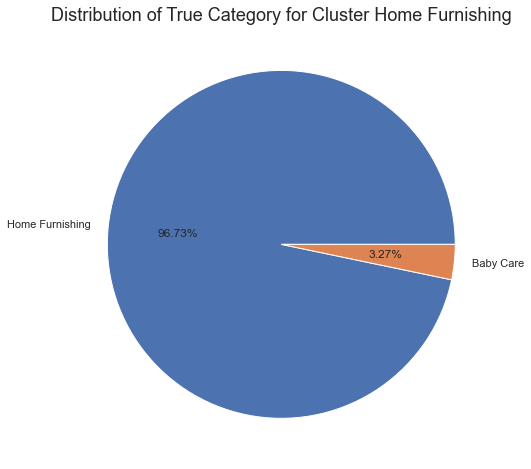

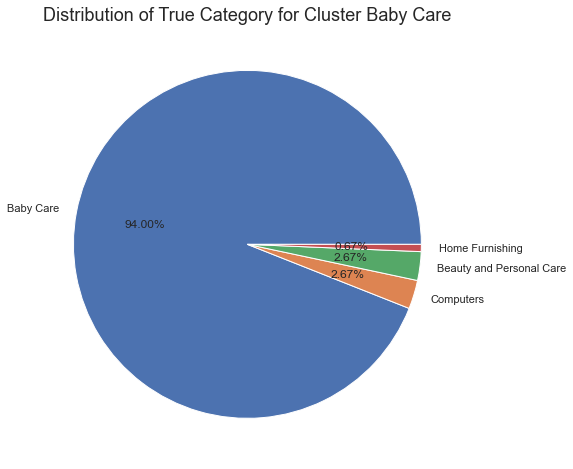

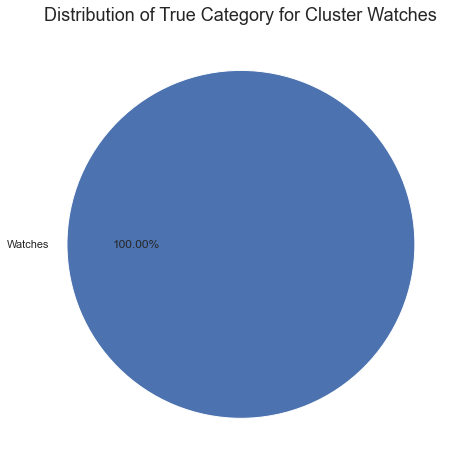

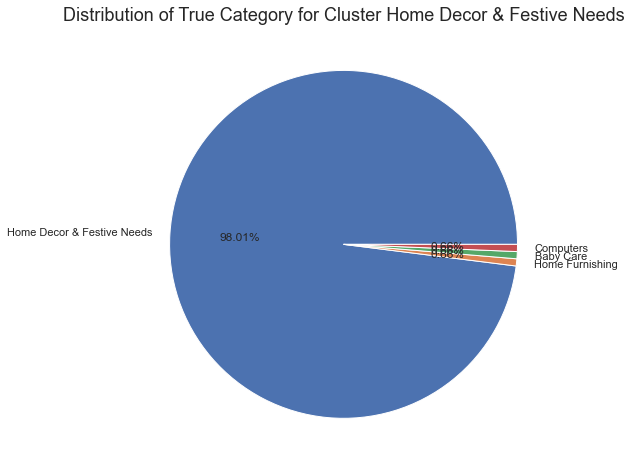

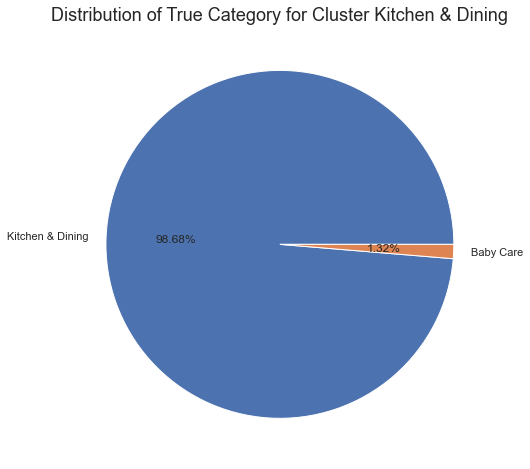

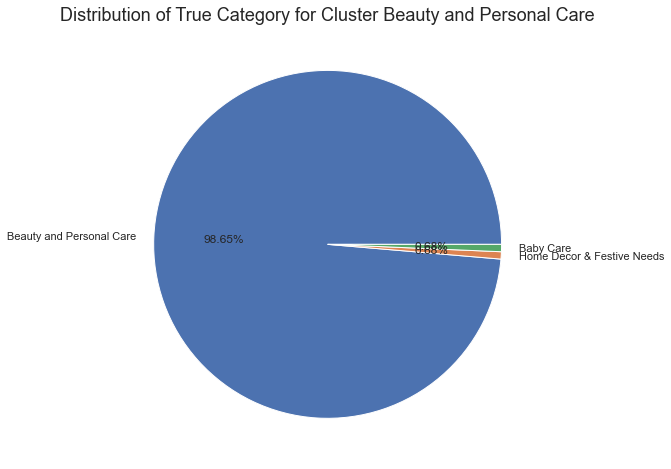

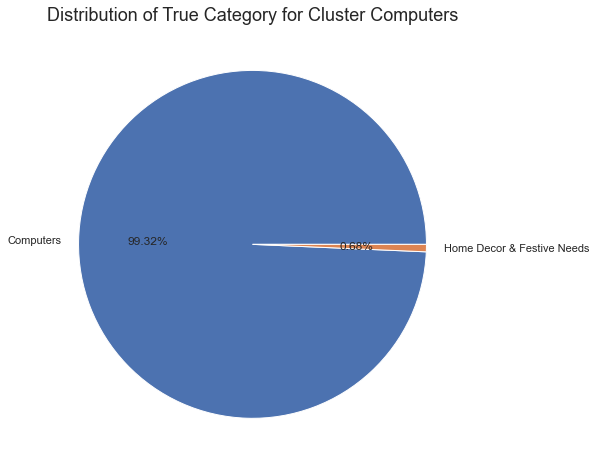

In [120]:
for i in df['Cluster_7'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + i, size=18)
    df[df['Cluster_7'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

In [121]:
pca = decomposition.PCA(n_components=0.99, random_state=42)
feat_pca = pca.fit_transform(df_tfidf)

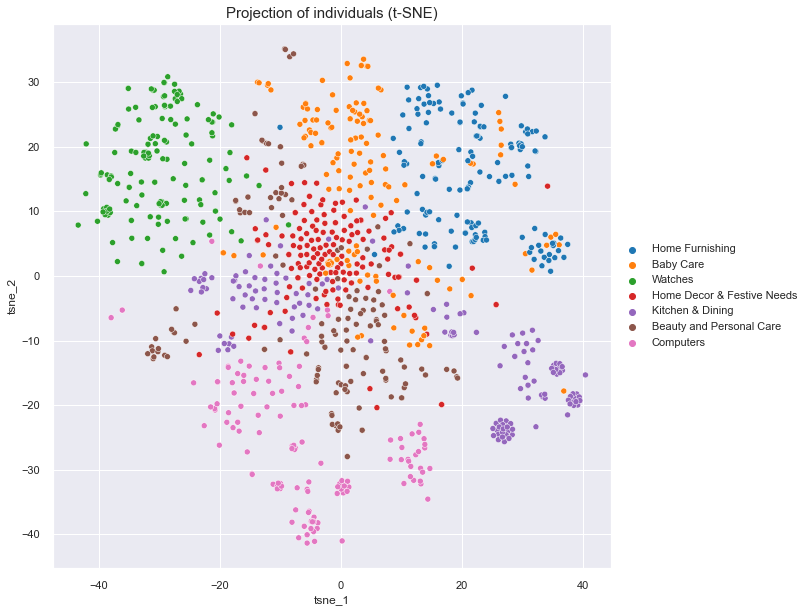

In [122]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_tfidf)

X_tsne_result = pd.DataFrame()
X_tsne_result['label'] = df['Cluster_7']
X_tsne_result['tsne_1'] = X_tsne[:, 0]
X_tsne_result['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue=X_tsne_result['label'],
                data=X_tsne_result,
                palette=sns.color_palette('tab10', n_colors=7))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 4. Image data<a class="anchor" id="chapter4"></a>

## 4.1. ORB<a class="anchor" id="section_4_1"></a>

In this part, we will perform a clustering via the ORB method.

### Creation of descriptors for each image

In [123]:
path = "C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [124]:
if not os.path.exists('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images_Preprocessing'):
    os.makedirs('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images_Preprocessing')

In [125]:
# identification of key points and associated descriptors
orb_keypoints = []
orb = cv2.ORB_create(500)

for image_num in range(len(list_photos)):
    if image_num%100 == 0:
        print(image_num)
    image = cv2.imread(path + list_photos[image_num], 0)
    image = cv2.blur(image, (1, 1))
    res = cv2.equalizeHist(image)
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)
    name = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images_Preprocessing/' + list_photos[image_num]
    cv2.imwrite(name,res)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all = np.concatenate(orb_keypoints_by_img, axis=0)

print("Number of descriptors : ", orb_keypoints_all.shape)

0
100
200
300
400
500
600
700
800
900
1000
Number of descriptors :  (520145, 32)


C:\Users\melme\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Creation of descriptor clusters

In [126]:
k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Number of estimated clusters : ", k)
print("Creation of ", k," descriptor clusters ...")

# Clustering
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=42)
kmeans.fit(orb_keypoints_all)

Number of estimated clusters :  721
Creation of  721  descriptor clusters ...


MiniBatchKMeans(init_size=2163, n_clusters=721, random_state=42)

In [127]:
# Creation of histograms (features)
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0:
        print("image histogram problem  : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0:
        print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

0
100
200
300
400
500
600
700
800
900
1000


### Dimension reduction

In [128]:
pca = decomposition.PCA(n_components=0.99, random_state=42)
feat_pca = pca.fit_transform(im_features)

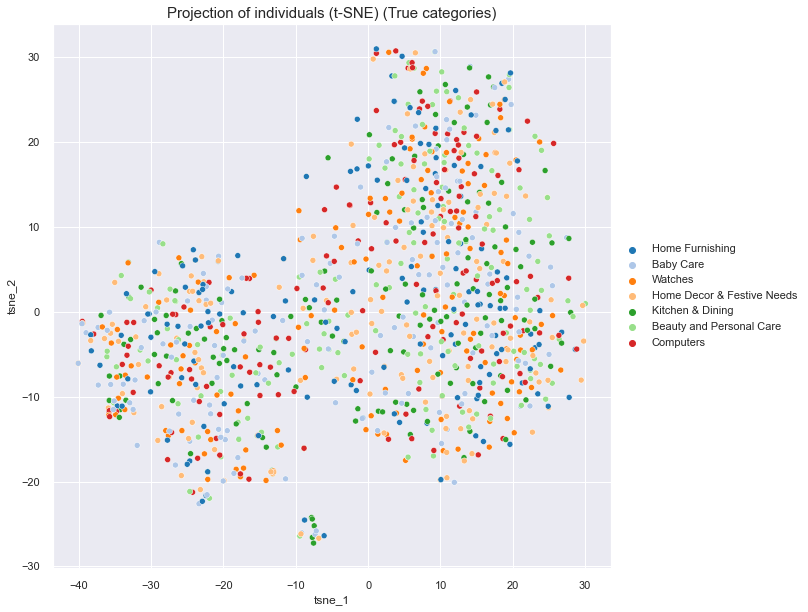

In [129]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame()
df_tsne['label'] = df['cat_1']
df_tsne['tsne_1'] = X_tsne[:, 0]
df_tsne['tsne_2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE) (True categories)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue='label',
                data=df_tsne,
                palette=sns.color_palette('tab20', n_colors=df_tsne['label'].nunique()))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Creation of Clusters

In [130]:
cls = KMeans(n_clusters=7, random_state=42)
cls.fit(X_tsne)

df_tsne['cluster'] = cls.labels_
df['Cluster_8'] = df_tsne['cluster']
print(df_tsne.shape)

(1050, 4)


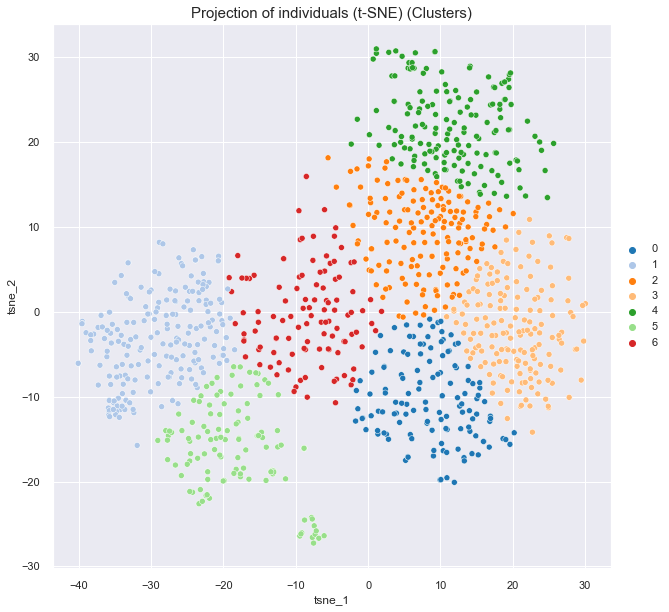

In [131]:
plt.figure(figsize=(10, 10))
plt.title('Projection of individuals (t-SNE) (Clusters)', size=15)

sns.scatterplot(x='tsne_1', y='tsne_2',
                hue='cluster',
                data=df_tsne,
                palette=sns.color_palette('tab20', n_colors=df_tsne['cluster'].nunique()))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Count')

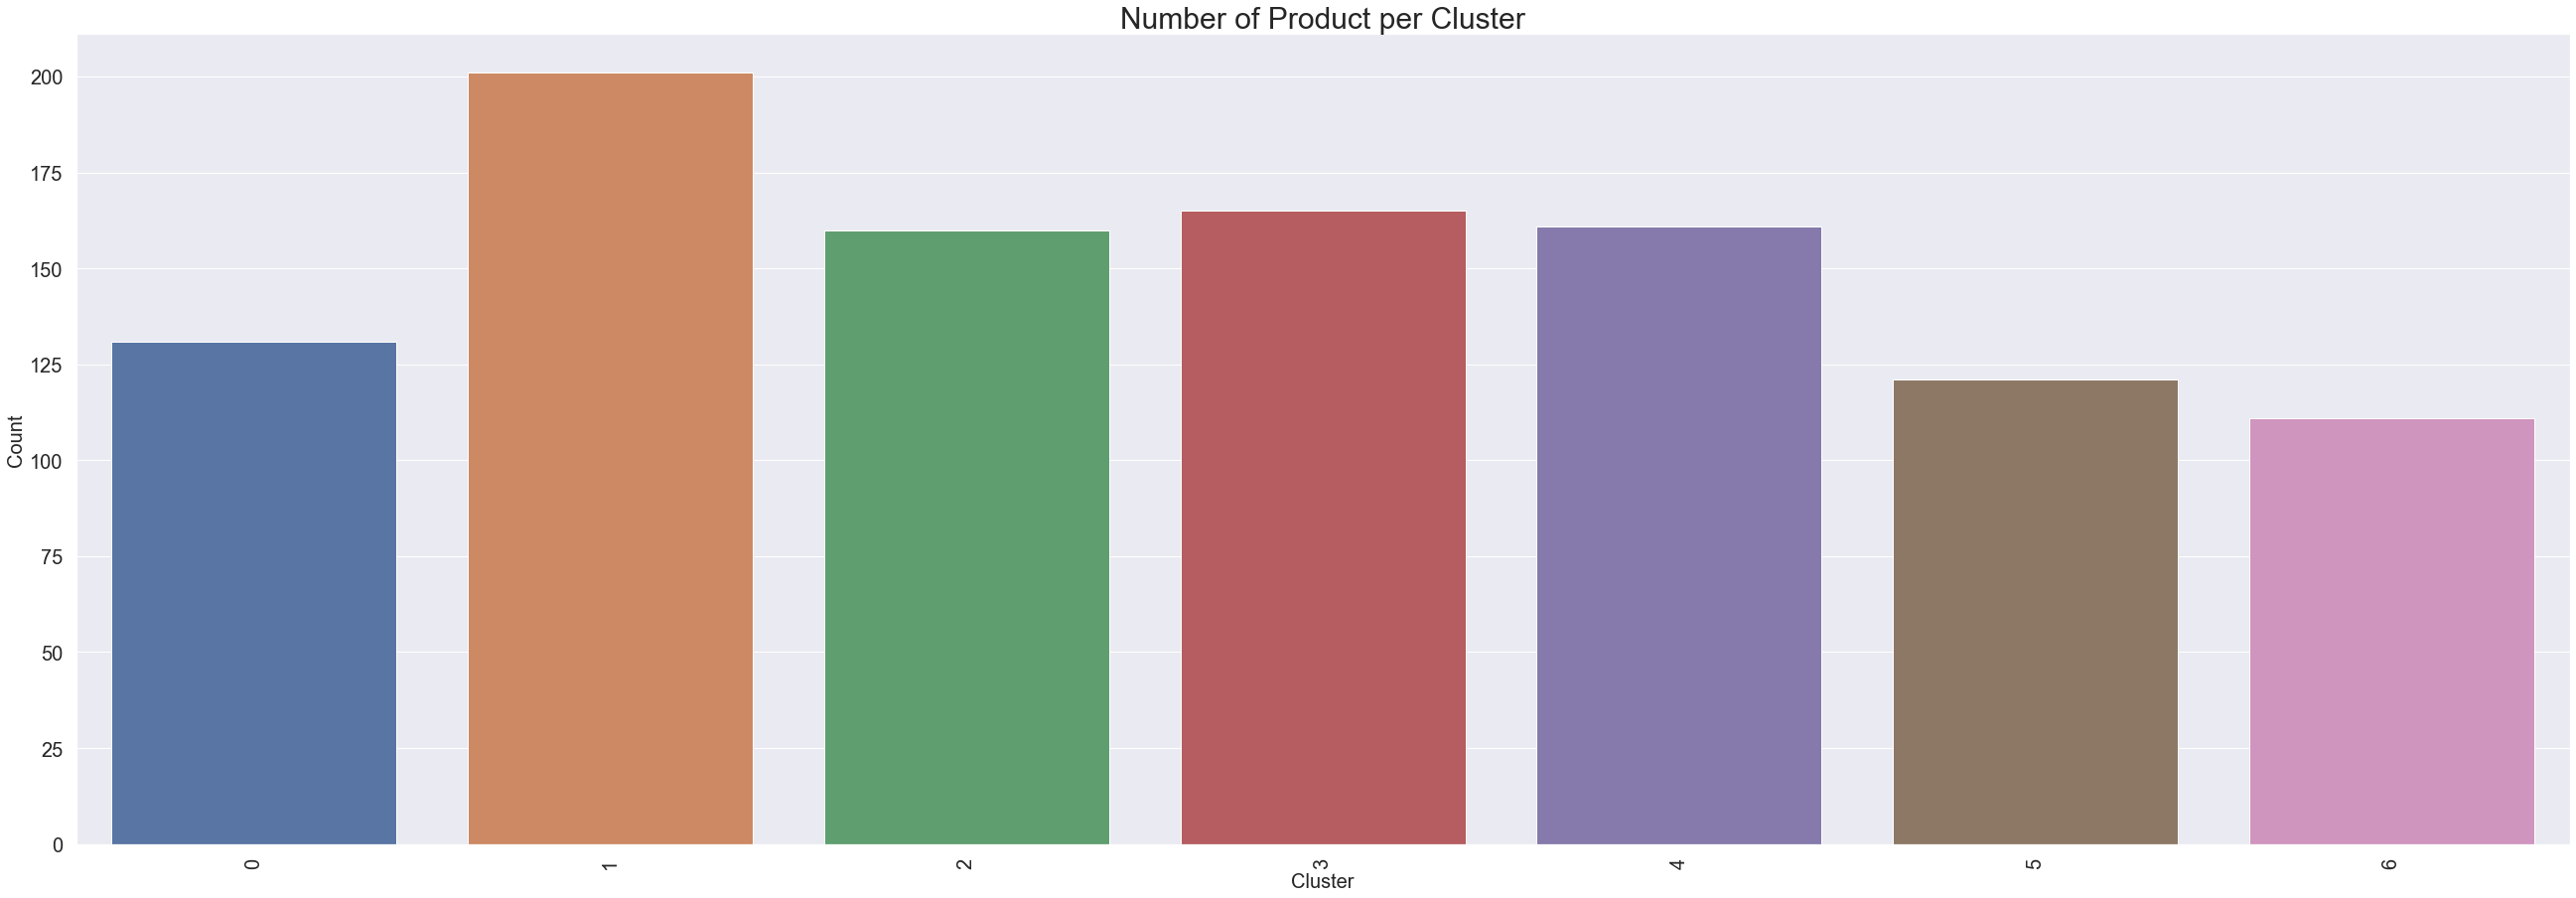

In [132]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_8'].value_counts().index,
            y=df['Cluster_8'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [133]:
print("ARI : ", metrics.adjusted_rand_score(df['cat_1'], df['Cluster_8']))

ARI :  -0.0015535249352082966


#### Confusion Matrix

In [134]:
df.groupby('Cluster_8').count()['cat_1']

Cluster_8
0    131
1    201
2    160
3    165
4    161
5    121
6    111
Name: cat_1, dtype: int64

In [135]:
le = preprocessing.LabelEncoder()
df['cat_1_e'] = le.fit_transform(df['cat_1'])

<AxesSubplot:>

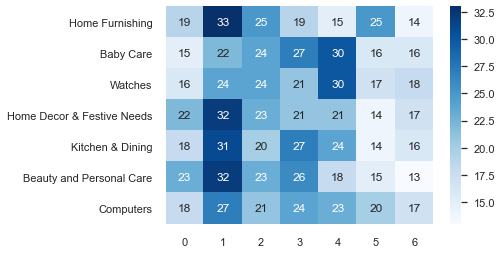

In [136]:
conf_mat = metrics.confusion_matrix(df['cat_1_e'], df['Cluster_8'])

df_cm = pd.DataFrame(conf_mat, index = [label for label in df['cat_1'].unique().tolist()],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

## 4.2. Transfer Learning & Fine-tuning<a class="anchor" id="section_4_2"></a>

- In this part, we will apply end-to-end transfer learning & fine-tuning on our images.
- We will load the Xception model, pre-trained on ImageNet, and use it on our classification dataset.
- We will use it first on unprocessed images, then on preprocessed images.

#### Without Preprocessing

In [137]:
name_path = ['Training/', 'Test/', 'Validation/']
# cat = [str(0), str(1), str(2), str(3), str(4), str(5), str(6)]
cat = df['cat_1'].unique().tolist()

In [138]:
for i in name_path:
    if not os.path.exists('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i):
        os.makedirs('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i)
        for j in cat:
            if not os.path.exists('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i + j):
                os.makedirs('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i + j)

In [139]:
# Training/testing
X_train, X_test, Y_train, Y_test = train_test_split(df['image'], df['cat_1'], test_size=0.20, random_state=42)

# Training/validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [140]:
path_1 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/'

In [141]:
def folder_img(X, Y, name):
    for i,j in zip(X, Y):
        img = cv2.imread(path + i)
        cv2.imwrite(path_1 + name + '/' + j + '/' + i, img)

In [142]:
folder_img(X_train, Y_train, 'Training')
folder_img(X_test, Y_test, 'Test')
folder_img(X_validation, Y_validation, 'Validation')

In [143]:
directory_1 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Training/'
directory_2 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Test/'
directory_3 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Validation/'

In [144]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_1,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_2,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_3,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

Found 672 files belonging to 7 classes.
Found 210 files belonging to 7 classes.
Found 168 files belonging to 7 classes.


In [145]:
data_augmentation = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal"), layers.experimental.preprocessing.RandomRotation(0.1),]
)

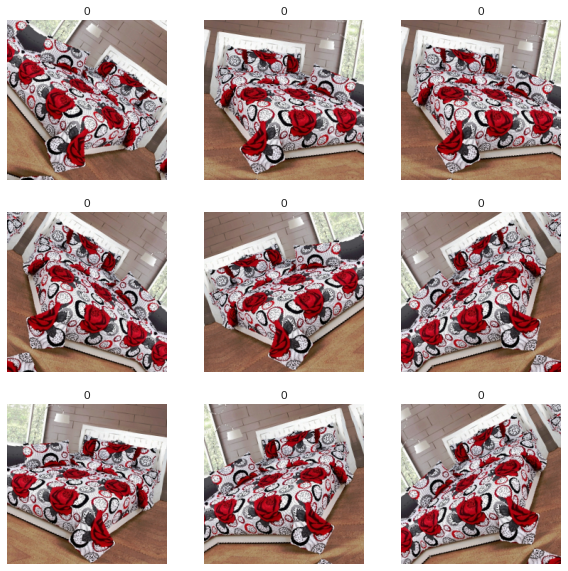

In [146]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [147]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(225, 225, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(225, 225, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.experimental.preprocessing.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(7, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 225, 225, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 225, 225, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 225, 225, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 1434

In [148]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
21/21 [==============================] - 118s 5s/step - loss: 3.6808 - accuracy: 0.0893 - val_loss: 1.8459 - val_accuracy: 0.3869
Epoch 2/20
21/21 [==============================] - 111s 5s/step - loss: 1.6105 - accuracy: 0.3705 - val_loss: 1.2236 - val_accuracy: 0.6131
Epoch 3/20
21/21 [==============================] - 111s 5s/step - loss: 1.4615 - accuracy: 0.4807 - val_loss: 0.8761 - val_accuracy: 0.7857
Epoch 4/20
21/21 [==============================] - 111s 5s/step - loss: 1.0775 - accuracy: 0.6503 - val_loss: 0.7524 - val_accuracy: 0.7976
Epoch 5/20
21/21 [==============================] - 111s 5s/step - loss: 0.9482 - accuracy: 0.7083 - val_loss: 0.6744 - val_accuracy: 0.8095
Epoch 6/20
21/21 [==============================] - 111s 5s/step - loss: 0.8552 - accuracy: 0.7366 - val_loss: 0.6314 - val_accuracy: 0.8095
Epoch 7/20
21/21 [==============================] - 110s 5s/step - loss: 0.7978 - accuracy: 0.7470 - val_loss: 0.5958 - val_accuracy: 0.8155
Epoch 8/20
21

In [149]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 225, 225, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 225, 225, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 225, 225, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 1434

In [150]:
indexes_pred = []
for i in range(df.shape[0]):
    img = keras.preprocessing.image.load_img(
        "C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images/" + df['image'][i], target_size=(225,225)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    indexes_pred.append(np.argmax(score))

C:\Users\melme\anaconda3\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [151]:
df['Cluster_9'] = indexes_pred

Text(0, 0.5, 'Count')

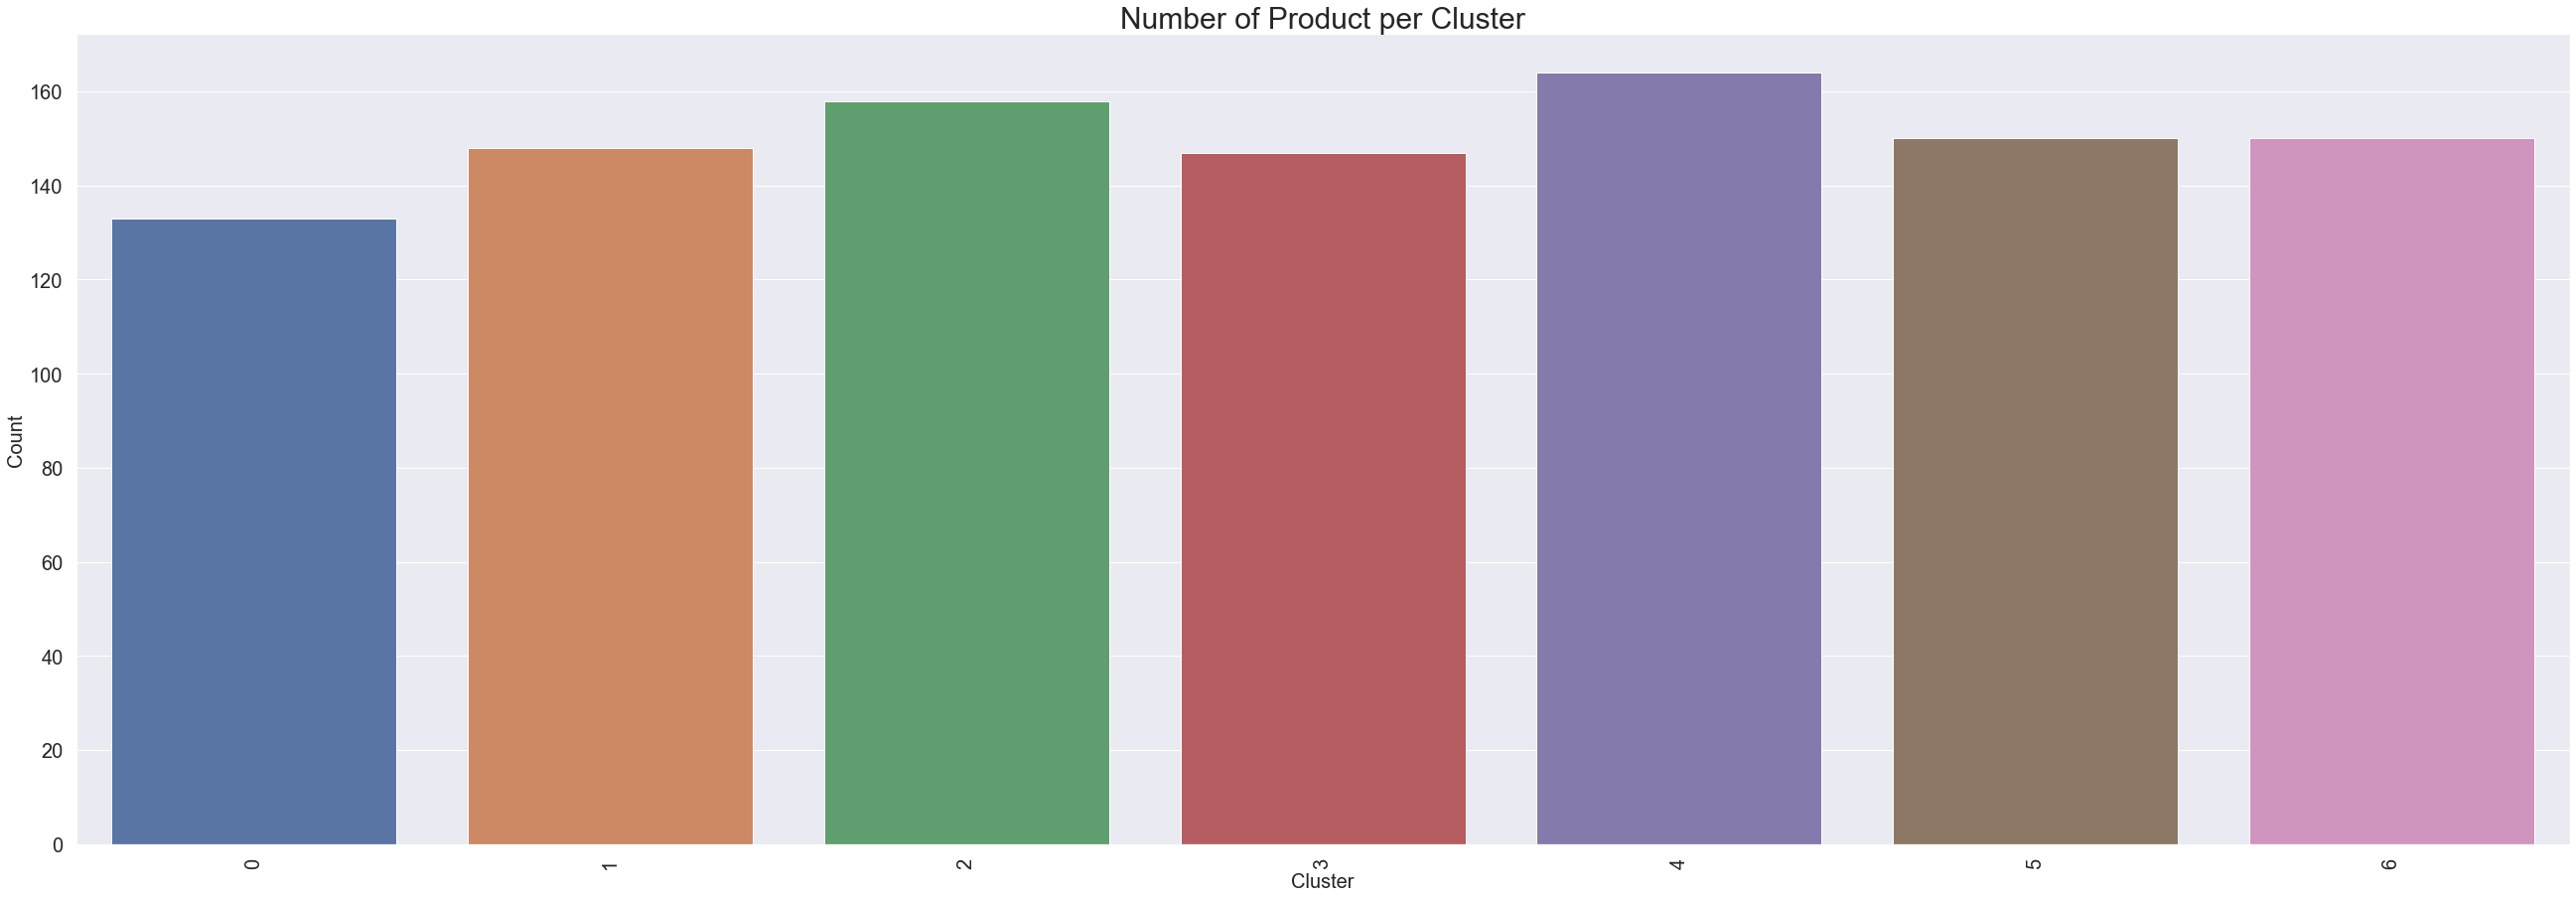

In [152]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_9'].value_counts().index,
            y=df['Cluster_9'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [153]:
print("ARI : ", metrics.adjusted_rand_score(df['cat_1'], df['Cluster_9']))

ARI :  0.8563182153382263


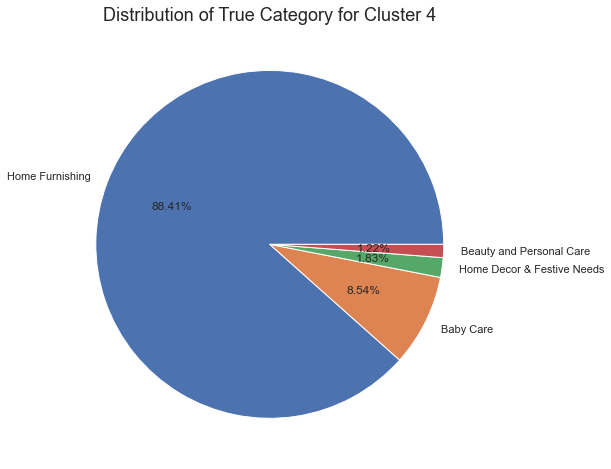

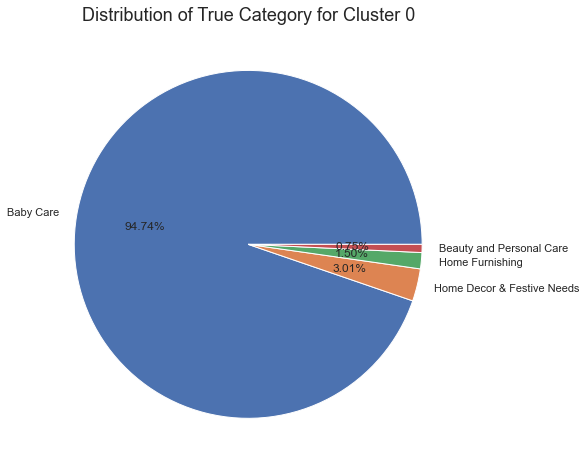

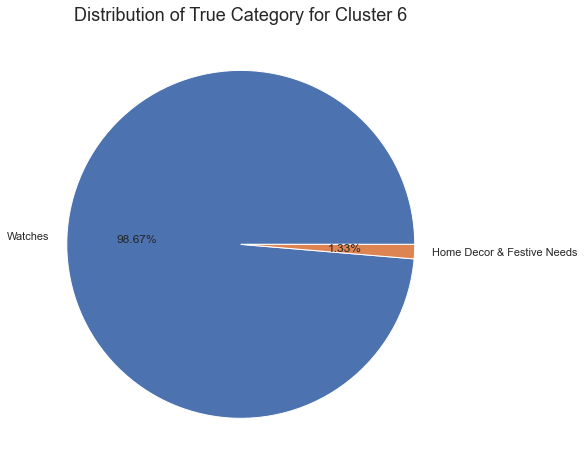

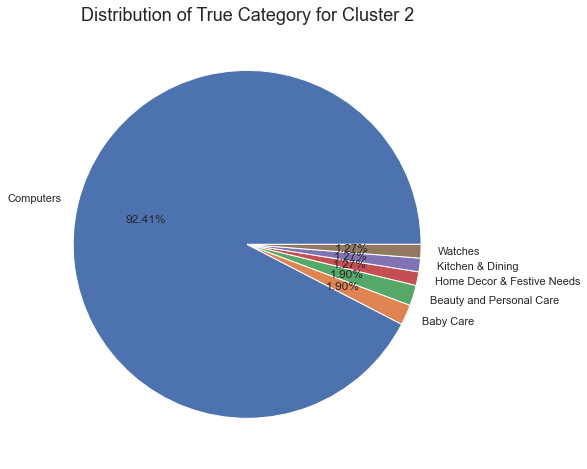

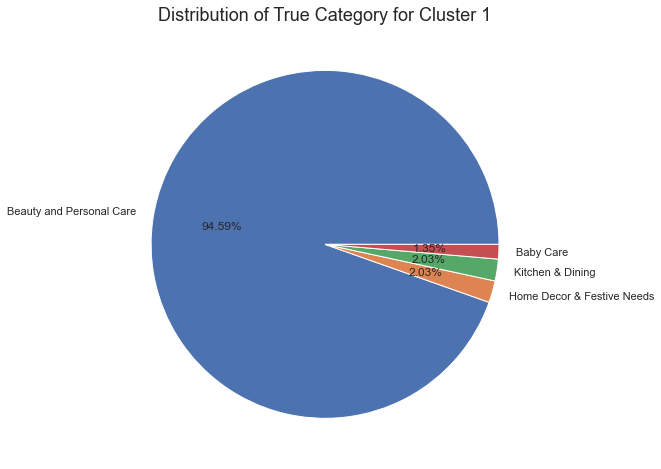

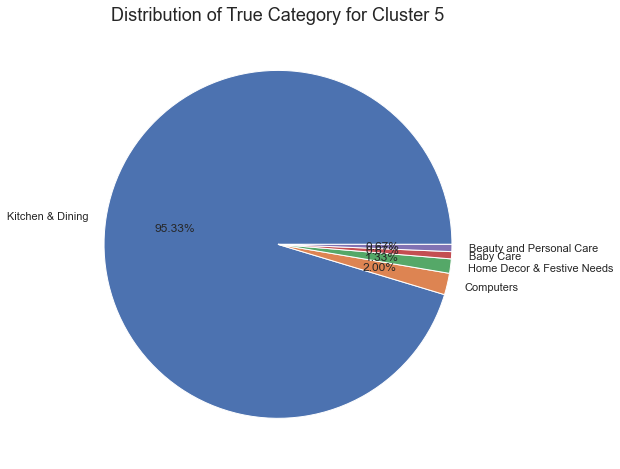

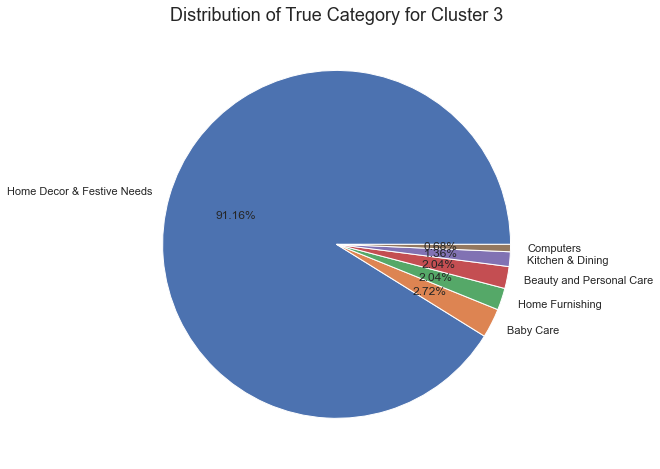

In [154]:
for i in df['Cluster_9'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_9'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')

#### With Preprocessing

In [155]:
name_path_P = ['Training_P/', 'Test_P/', 'Validation_P/']
cat = df['cat_1'].unique().tolist()

In [156]:
for i in name_path_P:
    if not os.path.exists('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i):
        os.makedirs('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i)
        for j in cat:
            if not os.path.exists('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i + j):
                os.makedirs('C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/' + i + j)

In [157]:
# Training/testing
X_train, X_test, Y_train, Y_test = train_test_split(df['image'], df['cat_1'], test_size=0.20, random_state=42)

# Training/validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [158]:
path_1 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/'

In [159]:
path_2 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images_Preprocessing/'

In [160]:
def folder_img(X, Y, name):
    for i,j in zip(X, Y):
        img = cv2.imread(path_2 + i)
        cv2.imwrite(path_1 + name + '/' + j + '/' + i, img)

In [161]:
folder_img(X_train, Y_train, 'Training_P')
folder_img(X_test, Y_test, 'Test_P')
folder_img(X_validation, Y_validation, 'Validation_P')

In [162]:
directory_1 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Training_P/'
directory_2 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Test_P/'
directory_3 = 'C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Validation_P/'

In [163]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_1,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_2,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory_3,
    shuffle=False,
    image_size=(225, 225),
    batch_size=32)

Found 672 files belonging to 7 classes.
Found 210 files belonging to 7 classes.
Found 168 files belonging to 7 classes.


In [164]:
data_augmentation = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal"), layers.experimental.preprocessing.RandomRotation(0.1),]
)

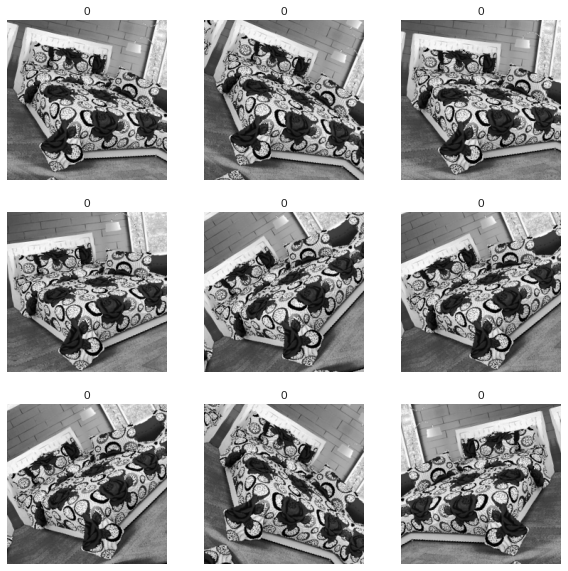

In [165]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [166]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(225, 225, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(225, 225, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.experimental.preprocessing.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(7, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 225, 225, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 225, 225, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 225, 225, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1434

In [167]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/20
21/21 [==============================] - 82s 4s/step - loss: 3.8563 - accuracy: 0.0908 - val_loss: 2.0731 - val_accuracy: 0.2857
Epoch 2/20
21/21 [==============================] - 76s 4s/step - loss: 1.7883 - accuracy: 0.2693 - val_loss: 1.5040 - val_accuracy: 0.5060
Epoch 3/20
21/21 [==============================] - 75s 4s/step - loss: 1.6802 - accuracy: 0.3795 - val_loss: 1.1031 - val_accuracy: 0.6607
Epoch 4/20
21/21 [==============================] - 74s 4s/step - loss: 1.2672 - accuracy: 0.5714 - val_loss: 0.9781 - val_accuracy: 0.6964
Epoch 5/20
21/21 [==============================] - 74s 4s/step - loss: 1.1718 - accuracy: 0.5818 - val_loss: 0.8915 - val_accuracy: 0.7381
Epoch 6/20
21/21 [==============================] - 74s 4s/step - loss: 1.0669 - accuracy: 0.6548 - val_loss: 0.8290 - val_accuracy: 0.7619
Epoch 7/20
21/21 [==============================] - 74s 4s/step - loss: 0.9642 - accuracy: 0.6786 - val_loss: 0.7925 - val_accuracy: 0.7738
Epoch 8/20
21/21 [==

In [168]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 225, 225, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 225, 225, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 225, 225, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1434

In [169]:
indexes_pred = []
for i in range(df.shape[0]):
    img = keras.preprocessing.image.load_img(
        "C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images_Preprocessing/" + df['image'][i], target_size=(225,225)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    indexes_pred.append(np.argmax(score))

C:\Users\melme\anaconda3\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [170]:
df['Cluster_10'] = indexes_pred

Text(0, 0.5, 'Count')

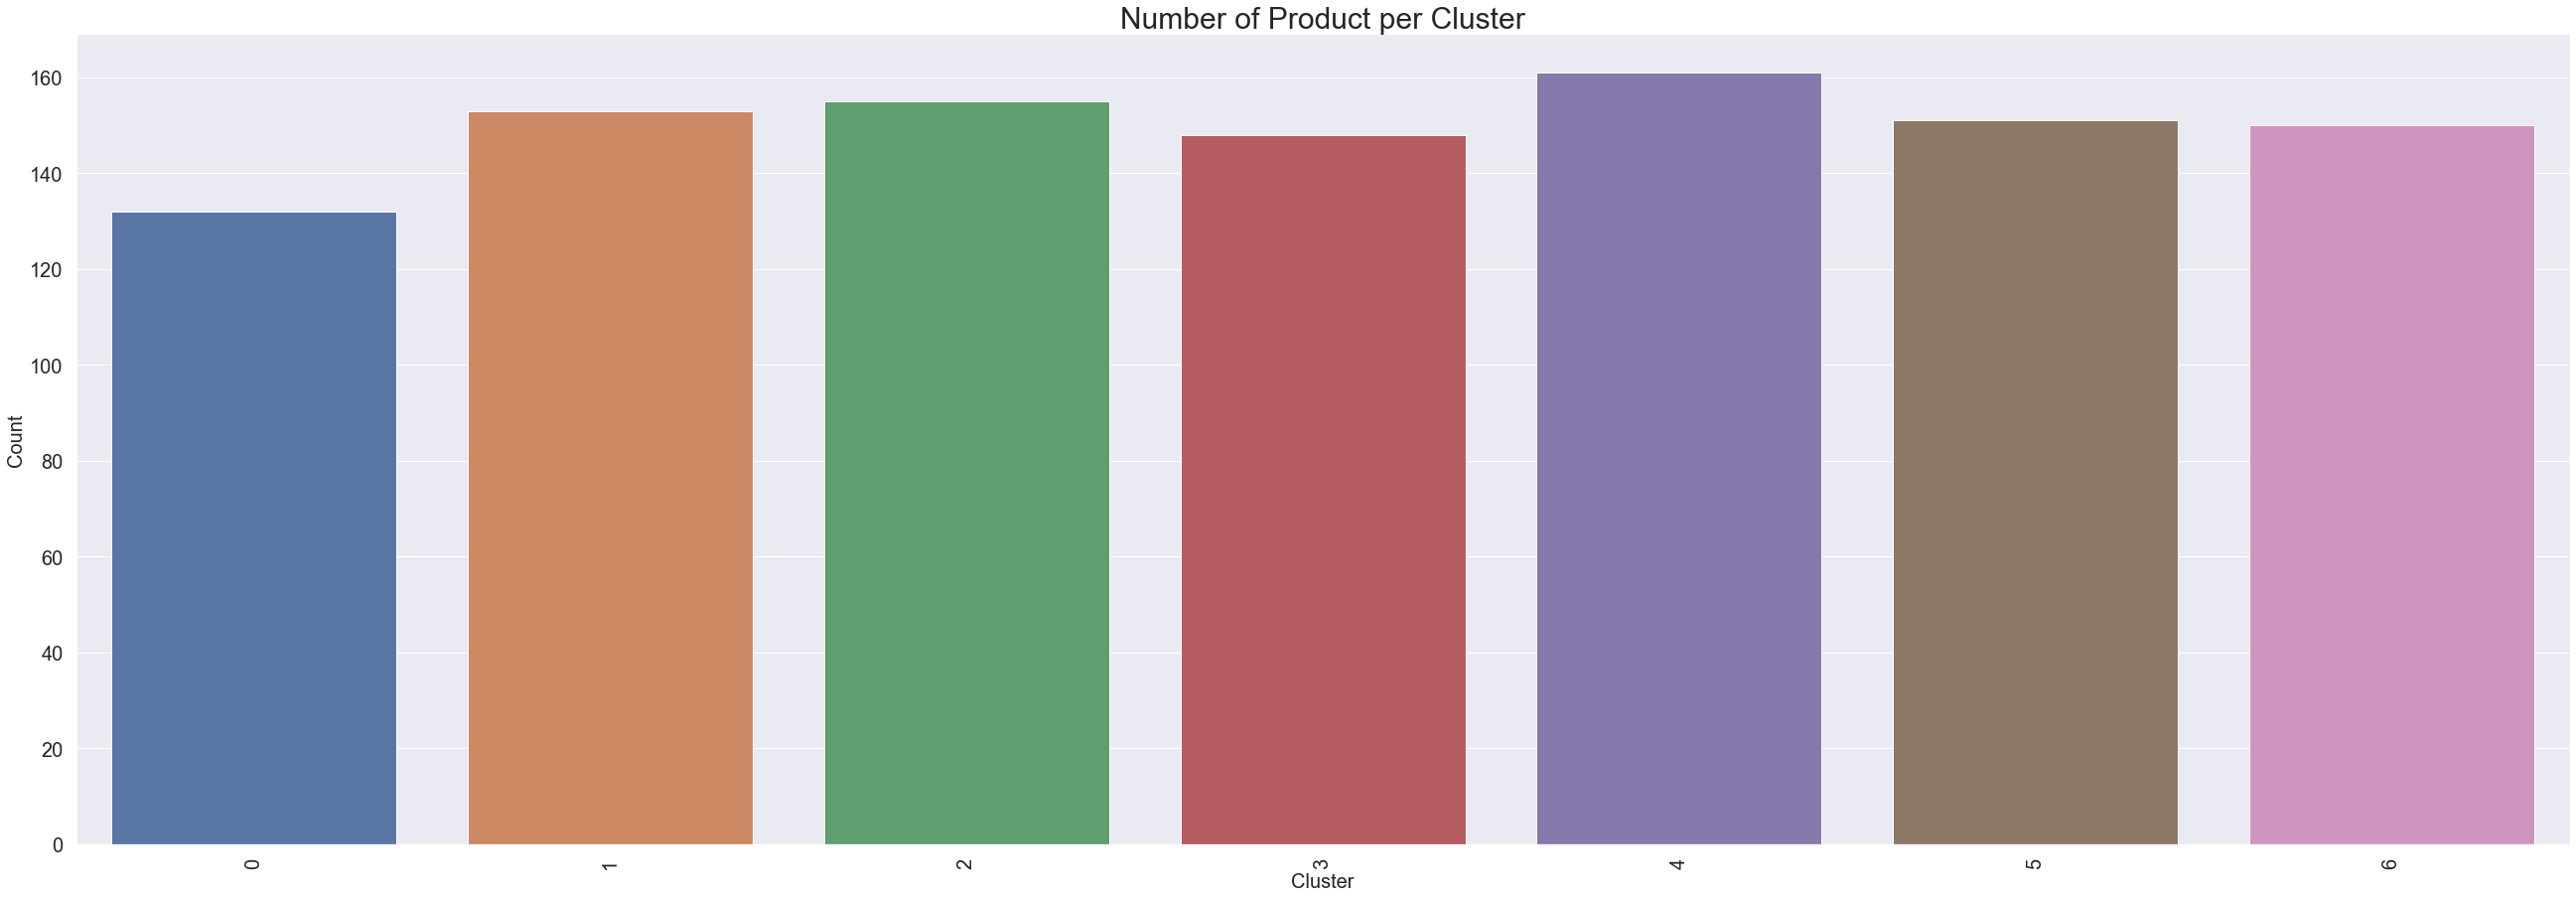

In [171]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['Cluster_10'].value_counts().index,
            y=df['Cluster_10'].value_counts())
plt.title('Number of Product per Cluster', fontsize=30)
plt.xlabel('Cluster', size=20)
plt.ylabel('Count', size=20)

In [172]:
print("ARI : ", metrics.adjusted_rand_score(df['cat_1'], df['Cluster_10']))

ARI :  0.8152991151465859


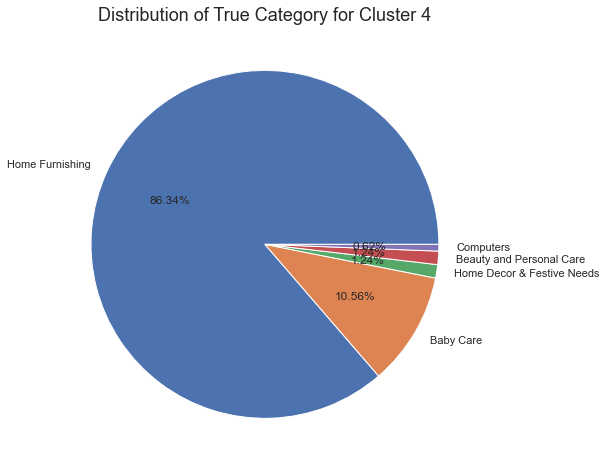

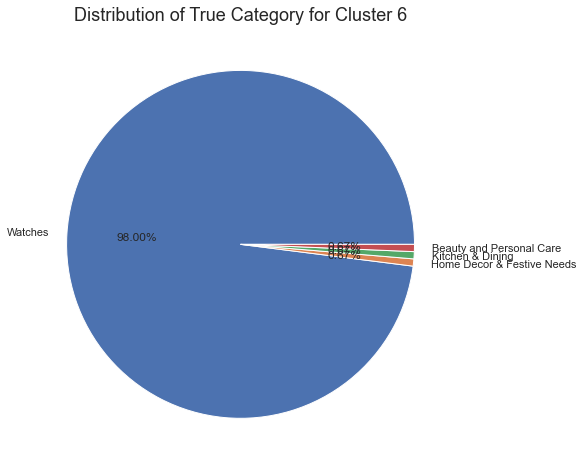

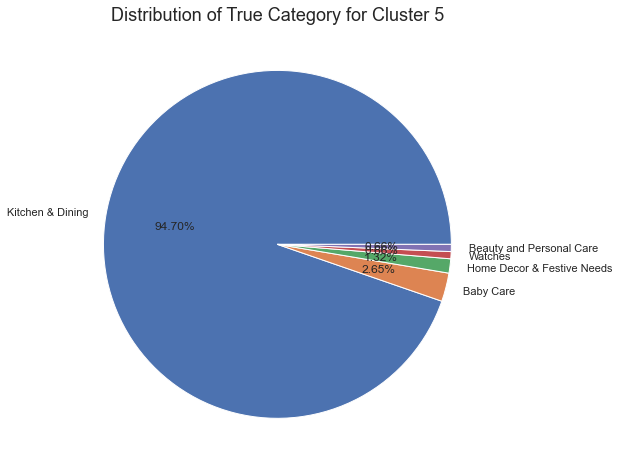

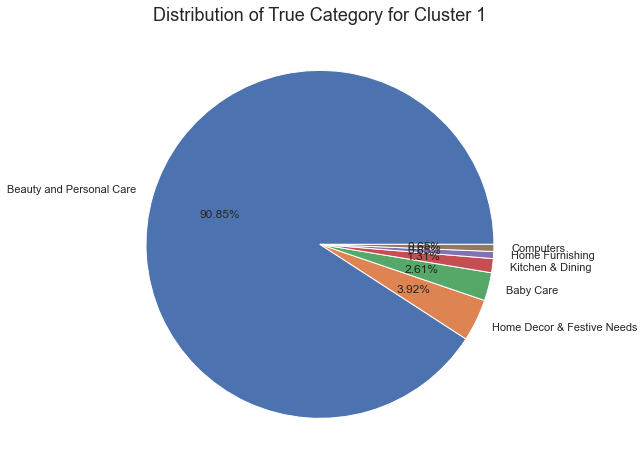

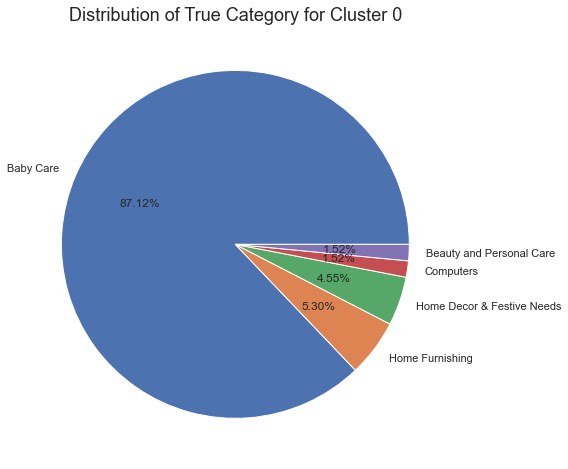

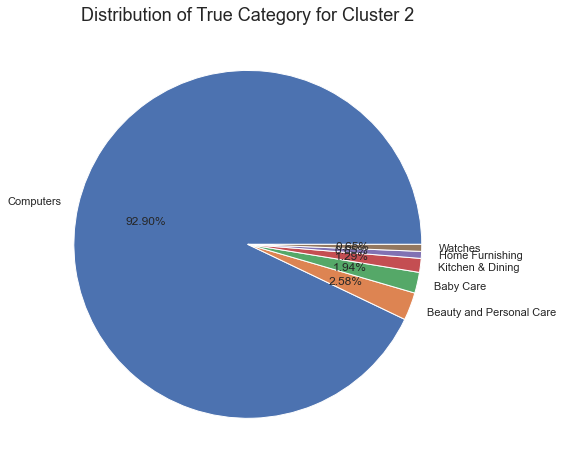

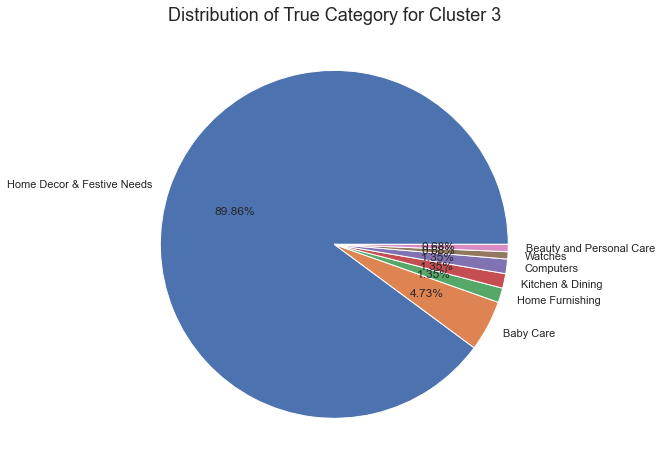

In [173]:
for i in df['Cluster_10'].unique().tolist():
    plt.figure()
    plt.title('Distribution of True Category for Cluster ' + str(i), size=18)
    df[df['Cluster_10'] == i]['cat_1'].value_counts().plot.pie(figsize=(8, 8), autopct="%1.2f%%", label='')